# Result Evaluation Model Performance

## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install openpyxl
!pip install deepsig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Organizing the data

In [ ]:
dataset_name = 'rotten'
model_names = ['timemil']
root_path = f"/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/experiments_{dataset_name}"

In [ ]:
# iterate through rootpath and retrieve contained subfolder names
subfolders = [f.path for f in os.scandir(root_path) if f.is_dir()]

subfolders_names = [None] * len(subfolders)
print(subfolders[0])
for i in range(len(subfolders)):
  subfolders_names[i] = subfolders[i].split('/')[-1]
  print(subfolders_names[i])

/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/experiments_rotten/timemil_rotten_run_0_time_2024-11-30_13-49-28
timemil_rotten_run_0_time_2024-11-30_13-49-28
timemil_rotten_run_1_time_2024-11-30_13-50-54
timemil_rotten_run_2_time_2024-11-30_13-51-52
timemil_rotten_run_3_time_2024-11-30_13-53-11
timemil_rotten_run_4_time_2024-11-30_13-54-51
timemil_rotten_run_5_time_2024-11-30_13-56-05
timemil_rotten_run_6_time_2024-11-30_13-57-24
timemil_rotten_run_7_time_2024-11-30_13-58-52
timemil_rotten_run_8_time_2024-11-30_14-00-03
timemil_rotten_run_9_time_2024-11-30_14-01-07
timemil_rotten_run_10_time_2024-11-30_14-02-23
timemil_rotten_run_11_time_2024-11-30_14-04-10
timemil_rotten_run_12_time_2024-11-30_14-05-16
timemil_rotten_run_13_time_2024-11-30_14-06-45
timemil_rotten_run_14_time_2024-11-30_14-08-17
timemil_rotten_run_15_time_2024-11-30_14-09-35
timemil_rotten_run_16_time_2024-11-30_14-11-21
timemil_rotten_run_17_time_2024-11-30_14-13-20
timemil_rotten_run_18_time_2024-1

In [ ]:
# create empty dataframe

# iterate through subfolders
rotten_df_metrics = pd.DataFrame()
imdb_df_metrics = pd.DataFrame()
twitter_df_metrics = pd.DataFrame()

def find_csv_filenames(path_to_dir, suffix="test_metric_values.csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

for model in model_names:
  for folder in subfolders:
    subfolders_name = folder.split('/')[-1]
    if dataset_name in subfolders_name and model in subfolders_name:
      # check for file in subfolder that ends by "test_metric_values.csv"
      filenames = find_csv_filenames(folder)
      for filename in filenames:
          metric_file_path = folder + '/' + filename
          df_metrics = pd.read_csv(folder + '/' + filename)

          if 'rotten' in subfolders_name:
            rotten_df_metrics = pd.concat([rotten_df_metrics, df_metrics], ignore_index=True)


In [ ]:
import os
import pandas as pd

# Initialize empty DataFrames for each dataset
dataset_metrics = {
    'rotten': pd.DataFrame(),
    'imdb': pd.DataFrame(),
    'twitter': pd.DataFrame()
}

# Helper function to find CSV filenames with a specific suffix
def find_csv_filenames(path_to_dir, suffix="test_metric_values.csv"):
    filenames = os.listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]


# Base directory where all experiment subfolders are located
base_dir = f"/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new"  # Replace with your experiments folder path
model_names = ["timemil", "todynet", "lstm_classifier"]  # Add your model names here
dataset_names = dataset_metrics.keys()  # ['rotten', 'imdb', 'twitter']

# Iterate through dataset-specific experiment directories
for dataset_name in dataset_names:
    dataset_dir = os.path.join(base_dir, f"experiments_{dataset_name}")
    if not os.path.exists(dataset_dir):
        print(f"Directory {dataset_dir} does not exist.")
        continue

    # Iterate through all subfolders in the dataset directory
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)

        # Ensure it's a directory and matches a model name and dataset name
        if os.path.isdir(folder_path) and any(model in folder for model in model_names) and dataset_name in folder:
            # Check for CSV files in the folder
            csv_files = find_csv_filenames(folder_path)
            for filename in csv_files:
                csv_path = os.path.join(folder_path, filename)
                df_metrics = pd.read_csv(csv_path)

                # Add metadata columns for model, dataset, and run
                model_name = [model for model in model_names if model in folder][0]  # Extract model name
                run_index = int(filename.split('_')[1])  # Extract run index from the filename
                df_metrics['model'] = model_name
                df_metrics['dataset'] = dataset_name
                df_metrics['run'] = run_index

                # Append metrics to the corresponding dataset DataFrame
                dataset_metrics[dataset_name] = pd.concat([dataset_metrics[dataset_name], df_metrics], ignore_index=True)

# At this point, `dataset_metrics['rotten']`, `dataset_metrics['imdb']`, and `dataset_metrics['twitter']` contain the aggregated results

# Save each dataset's metrics to CSV for inspection
# for dataset_name, df in dataset_metrics.items():
#     output_path = f"{dataset_name}_aggregated_metrics.csv"
#     df.to_csv(output_path, index=False)
#     print(f"Aggregated metrics for {dataset_name} saved to {output_path}.")


In [ ]:
base_dir = f"/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new"
results_folder = "results"
results_path = os.path.join(base_dir, results_folder)
os.makedirs(results_path, exist_ok=True)

# Iterate through dataset-specific experiment directories
# Save each dataset's metrics to CSV for inspection
for dataset_name, df in dataset_metrics.items():
    output_file = f"{dataset_name}_aggregated_metrics.parquet"
    output_path = os.path.join(results_path, output_file)
    df.to_parquet(output_path, index=False)
    print(f"Aggregated metrics for {dataset_name} saved to {output_path}.")

Aggregated metrics for rotten saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/rotten_aggregated_metrics.parquet.
Aggregated metrics for imdb saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/imdb_aggregated_metrics.parquet.
Aggregated metrics for twitter saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/twitter_aggregated_metrics.parquet.


In [ ]:
# save each dataset to excel file using pandas
for dataset_name, df in dataset_metrics.items():
    output_file = f"{dataset_name}_aggregated_metrics.xlsx"
    output_path = os.path.join(results_path, output_file)
    df.to_excel(output_path, index=False)
    print(f"Aggregated metrics for {dataset_name} saved to {output_path}.")


Aggregated metrics for rotten saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/rotten_aggregated_metrics.xlsx.
Aggregated metrics for imdb saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/imdb_aggregated_metrics.xlsx.
Aggregated metrics for twitter saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/twitter_aggregated_metrics.xlsx.


# Extreacting the mean result across experiment run

Visualization of results for each dataset and model over runs as linechart

## Rotten

In [ ]:
df = dataset_metrics['twitter']
mean_df = df.groupby('model').agg(MeanF1Score=('test_f1', 'mean'), StdF1Score=('test_f1', 'std'),
                        MeanLoss=('test_loss', 'mean'), StdLoss=('test_loss', 'std'),
                        MeanAcc=('test_acc', 'mean'), StdAcc=('test_acc', 'std'),
                        MeanPrecision=('test_precision', 'mean'), StdPrecision=('test_precision', 'std'),
                        MeanRecall=('test_recall', 'mean'), StdRecall=('test_recall', 'std'),
                        MeanAUC=('test_auc', 'mean'), StdAUC=('test_auc', 'std'))


F1

In [ ]:
mean_df[["MeanF1Score"]] #, "StdF1Score"]]

,MeanF1Score
model,
lstm_classifier,0.423803
timemil,0.503830
todynet,0.491021


AUC

In [ ]:
mean_df[["MeanAUC"]] #, "StdAUC"]]

,MeanAUC
model,
lstm_classifier,0.698412
timemil,0.658596
todynet,0.749291


Precision

In [ ]:
mean_df[["MeanPrecision"]] #, "StdPrecision"]]

,MeanPrecision
model,
lstm_classifier,0.508332
timemil,0.456646
todynet,0.547320


Recall

In [ ]:
mean_df[["MeanRecall"]] #, "StdRecall"]]

,MeanRecall
model,
lstm_classifier,0.510556
timemil,0.469753
todynet,0.554691


Accuracy

In [ ]:
mean_df[["MeanAcc"]] #, "StdAcc"]]

,MeanAcc
model,
lstm_classifier,0.509040
timemil,0.650847
todynet,0.566667


Loss

In [ ]:
mean_df[["MeanLoss"]] #, "StdLoss"]] #

,MeanLoss
model,
lstm_classifier,0.567411
timemil,0.612022
todynet,0.461628


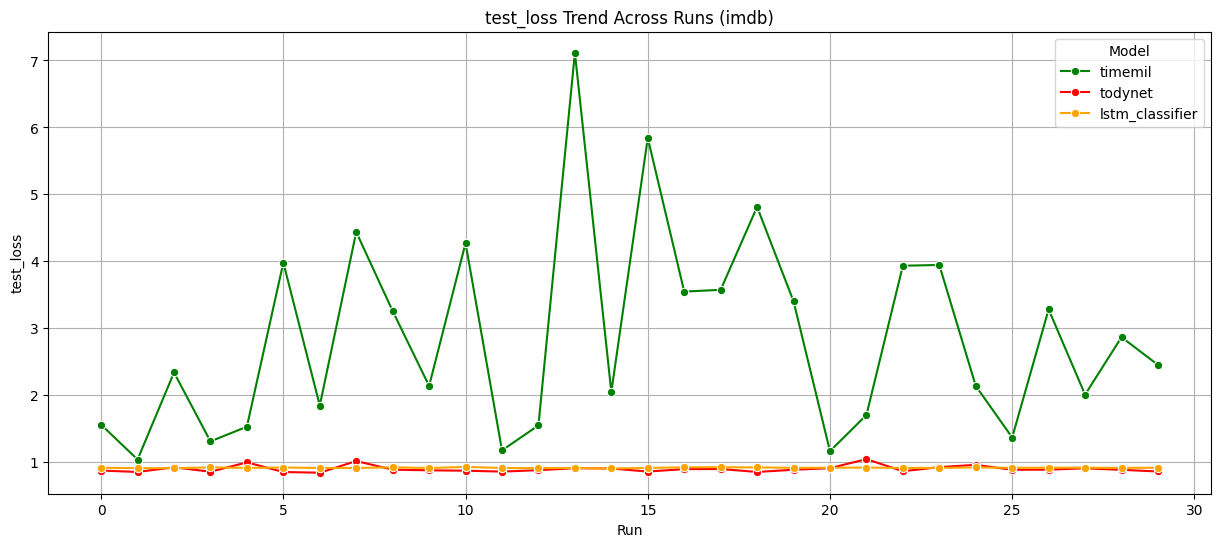

<ipython-input-17-1ad28f07734b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


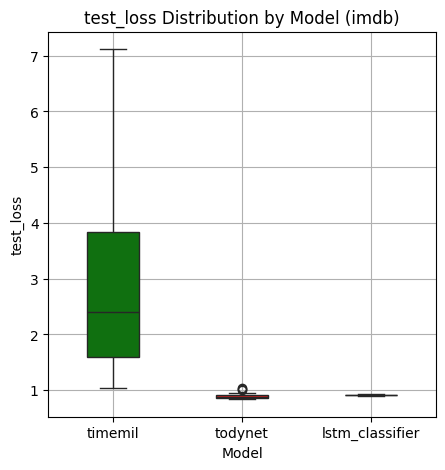

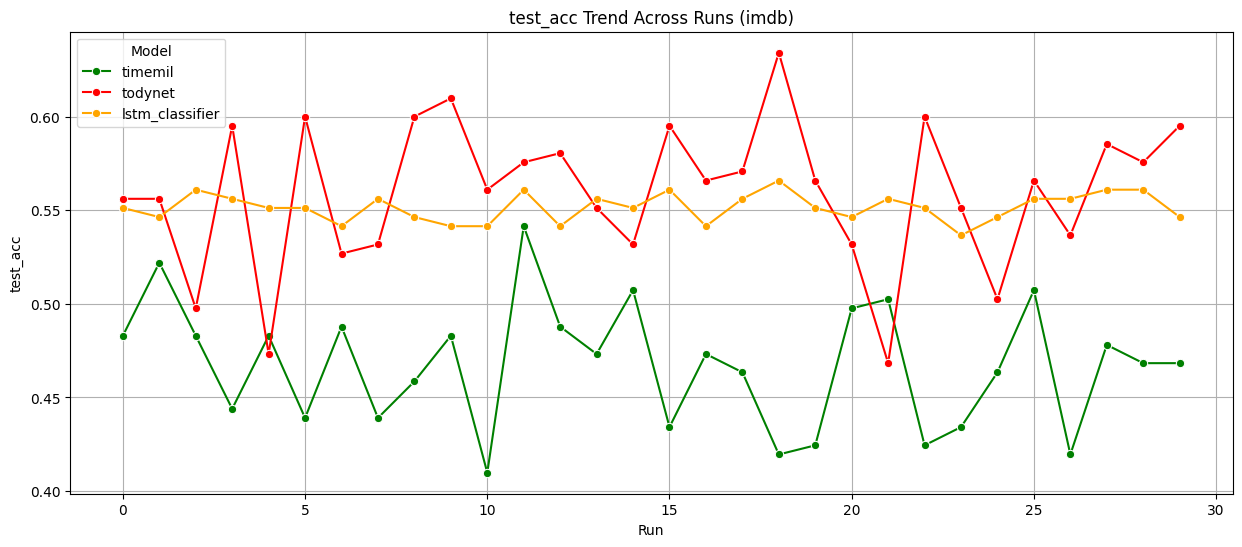

<ipython-input-17-1ad28f07734b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


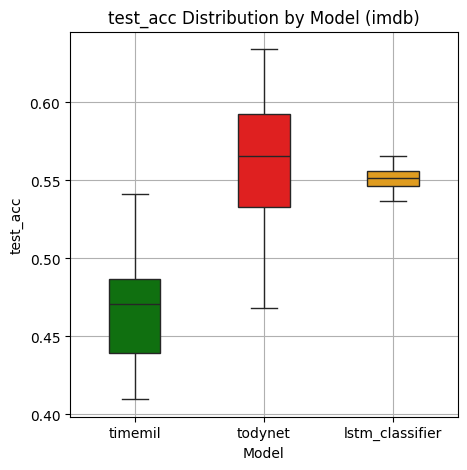

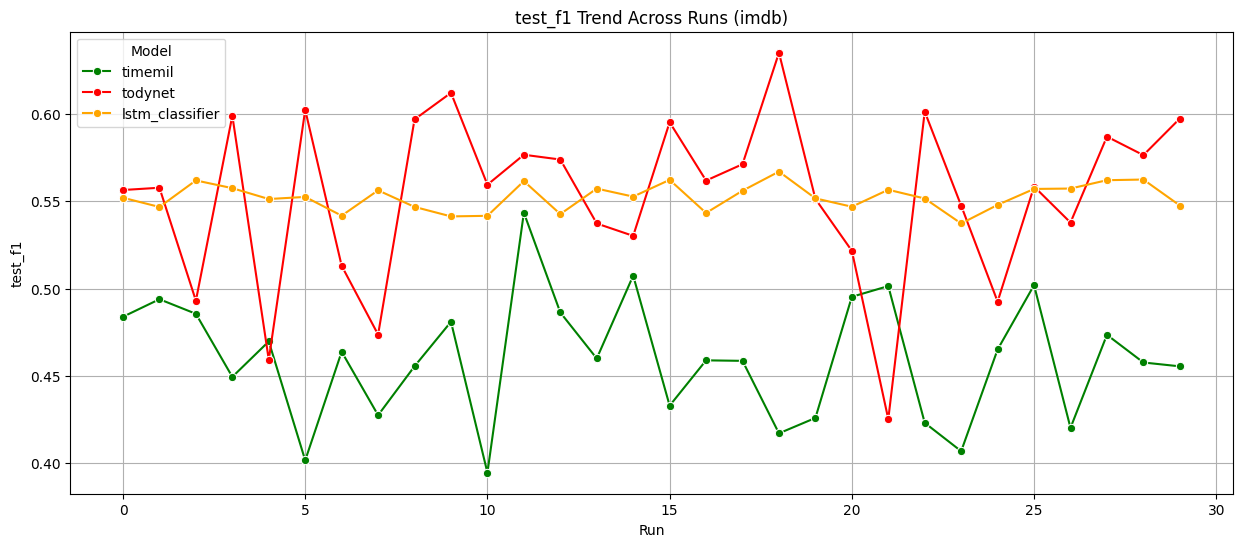

<ipython-input-17-1ad28f07734b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


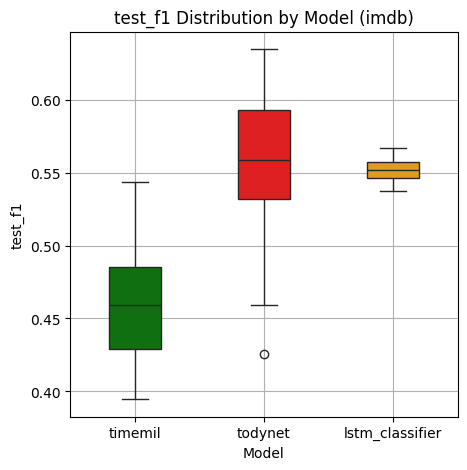

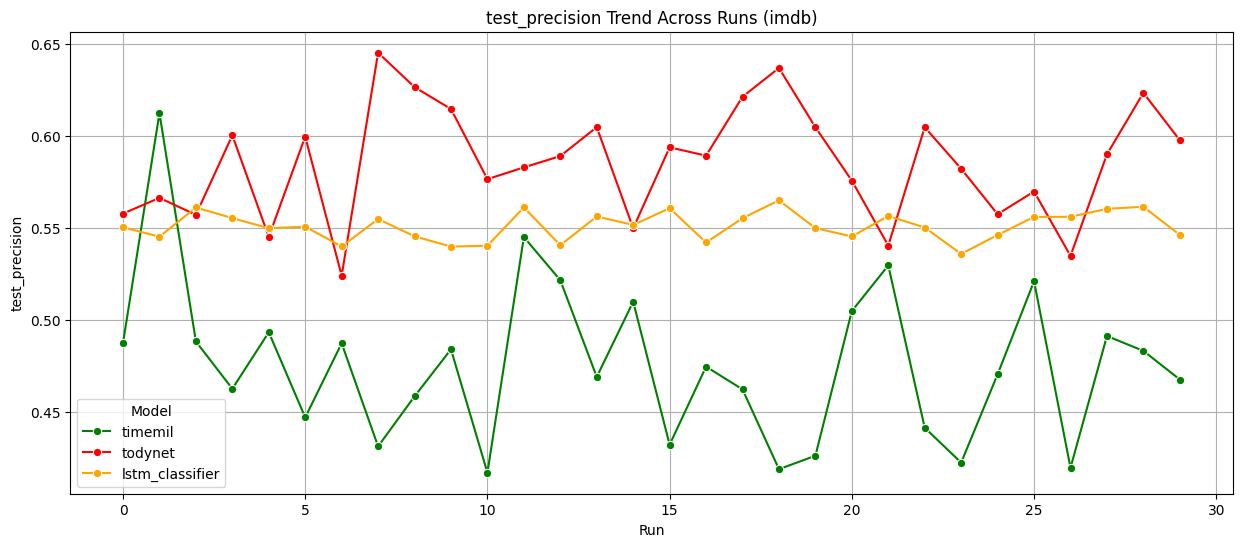

<ipython-input-17-1ad28f07734b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


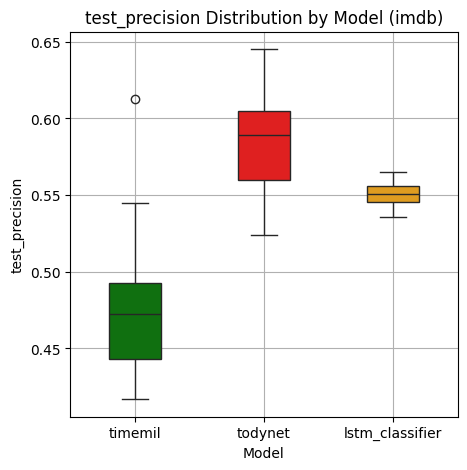

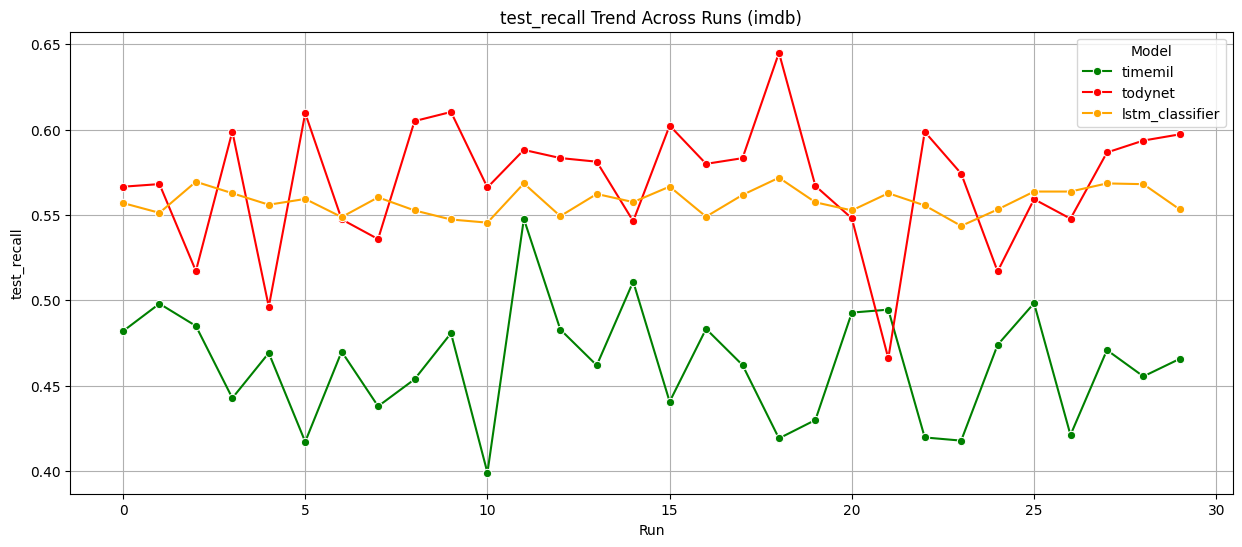

<ipython-input-17-1ad28f07734b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


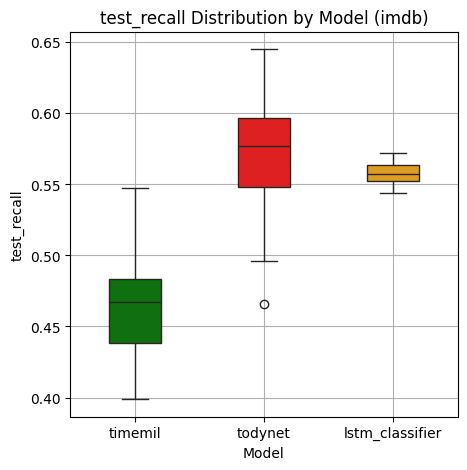

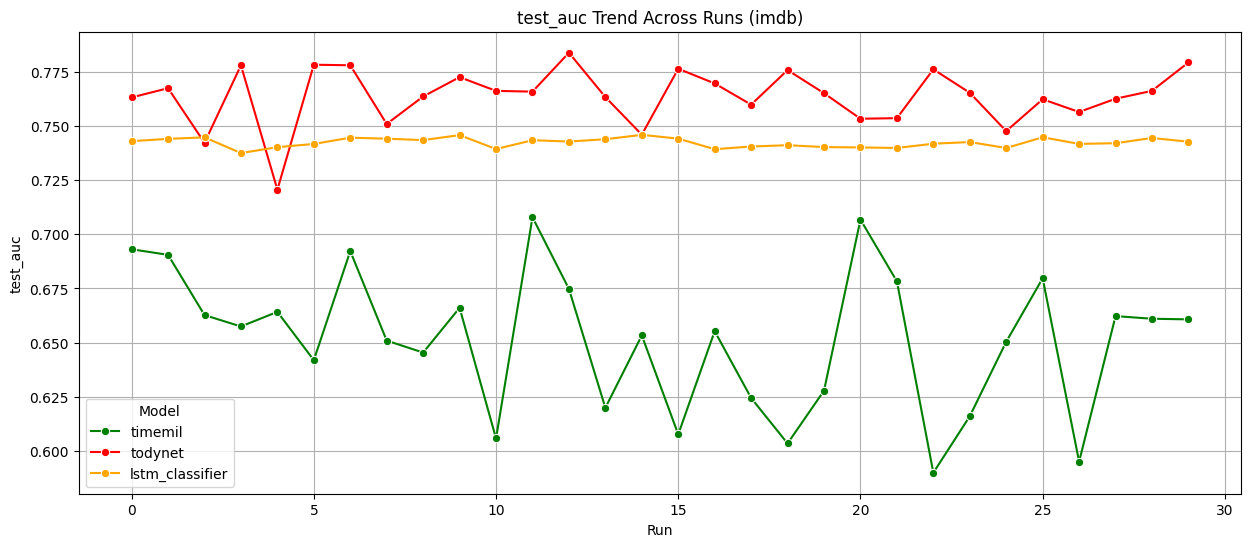

<ipython-input-17-1ad28f07734b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


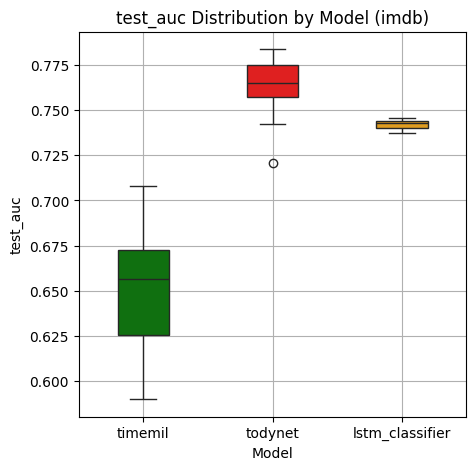

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_model_performance_seaborn(dataset_df, dataset_name):
    # metrics = ['test_loss', 'test_acc', 'test_f1', 'test_precision', 'test_recall', 'test_auc']
    metrics = ['test_acc', 'test_f1', 'test_precision', 'test_recall', 'test_auc']

    # Define colors for each model
    model_colors = {
        'timemil': 'green',
        'todynet': 'red',
        'lstm_classifier': 'orange'
    }

    # Create a color palette for the models
    palette = {model: color for model, color in model_colors.items()}

    # Create line charts and box plots for each metric
    for metric in metrics:
        # Line Chart
        plt.figure(figsize=(15, 6))
        sns.lineplot(
            data=dataset_df,
            x='run',
            y=metric,
            hue='model',
            palette=palette,
            marker='o'
        )
        plt.title(f'{metric} Trend Across Runs ({dataset_name})')
        plt.xlabel('Run')
        plt.ylabel(metric)
        plt.legend(title='Model')
        plt.grid(True)
        plt.show()

        # Box Plot
        # figsize(height, width
        fig, ax = plt.subplots(1, 3, figsize=(15, 6))
        sns.boxplot(
            data=dataset_df,
            x='model',
            y=metric,
            ax=ax[0],
            palette=palette,
            width=0.4,
            # linewidth=0.8  # Adjust this value to make the boxes thinner
        )
        ax[0].set_title(f'{metric} Distribution by Model ({dataset_name})')
        ax[0].set_xlabel('Model')
        ax[0].set_ylabel(metric)
        ax[0].grid(True)

        sns.boxplot(
            data=dataset_df,
            x='model',
            y=metric,
            ax=ax[0],
            palette=palette,
            width=0.4,
            # linewidth=0.8  # Adjust this value to make the boxes thinner
        )
        ax[0].set_title(f'{metric} Distribution by Model ({dataset_name})')
        ax[0].set_xlabel('Model')
        ax[0].set_ylabel(metric)
        ax[0].grid(True)


        plt.figure(figsize=(5, 5))
        sns.boxplot(
            data=dataset_df,
            x='model',
            y=metric,
            palette=palette,
            width=0.4,
            # linewidth=0.8  # Adjust this value to make the boxes thinner

        )
        plt.title(f'{metric} Distribution by Model ({dataset_name})')
        plt.xlabel('Model')
        plt.ylabel(metric)
        plt.grid(True)
        plt.show()

# Example usage for 'rotten' dataset
plot_model_performance_seaborn(dataset_metrics['imdb'], 'imdb')


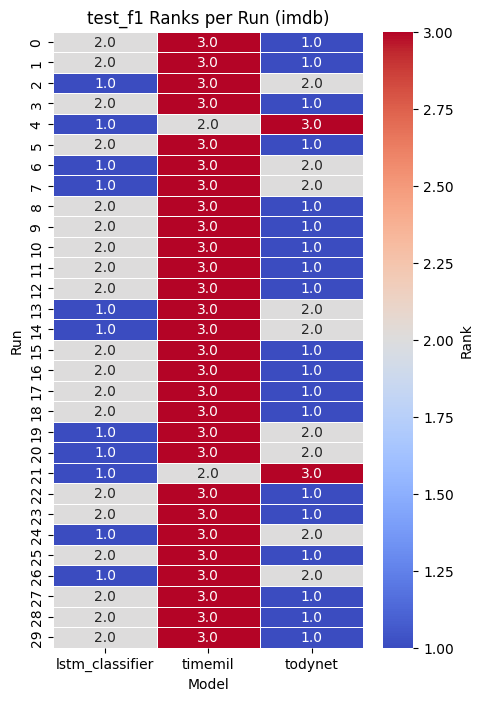

<ipython-input-60-275751f19043>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


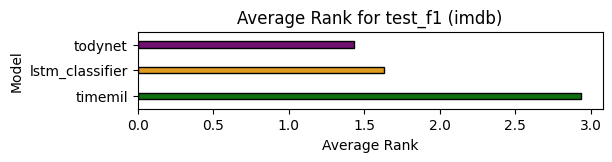

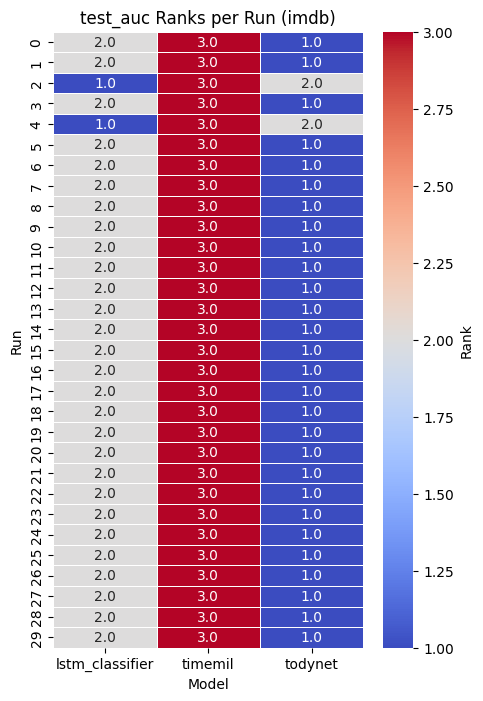

<ipython-input-60-275751f19043>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


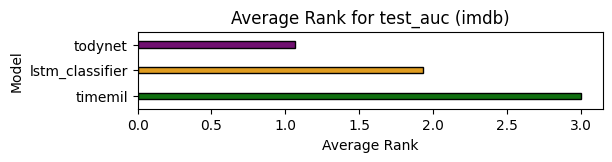

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_model_ranks(dataset_df, dataset_name):
    metrics = ['test_f1', 'test_auc']# ['test_loss', 'test_acc', 'test_f1', 'test_precision', 'test_recall', 'test_auc']

    # Define colors for each model
    model_colors = {
        'timemil': 'green',
        'todynet': 'purple',
        'lstm_classifier': 'orange'
    }
    # Create a color palette for heatmap and bar plot
    palette = {model: model_colors[model] for model in dataset_df['model'].unique()}

    for metric in metrics:
        # Calculate ranks for each run
        rank_df = dataset_df.pivot(index='run', columns='model', values=metric)
        rank_df = rank_df.rank(axis=1, ascending=(metric == 'test_loss'))  # Lower is better for test_loss

        # Compute average ranks
        avg_ranks = rank_df.mean(axis=0).sort_values()

        # Heatmap for ranks per run
        plt.figure(figsize=(5, 8))
        sns.heatmap(
            rank_df,
            annot=True,
            cmap='coolwarm',
            fmt=".1f",
            cbar_kws={'label': 'Rank'},
            linewidths=0.5
        )
        plt.title(f'{metric} Ranks per Run ({dataset_name})')
        plt.xlabel('Model')
        plt.ylabel('Run')
        plt.show()

        # Bar plot for average ranks
        plt.figure(figsize=(6, 1))
        sns.barplot(
            x=avg_ranks.values,
            y=avg_ranks.index,
            palette=[palette[model] for model in avg_ranks.index],  # Apply color coding
            edgecolor='black',
            width=0.25
            )
        plt.title(f'Average Rank for {metric} ({dataset_name})')
        plt.xlabel('Average Rank')
        plt.ylabel('Model')
        plt.show()

# Example usage for 'rotten' dataset
plot_model_ranks(dataset_metrics['imdb'], 'imdb')


In [ ]:
!pip install scikit-posthocs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 12.8 MB/s eta 0:00:00


In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import scikit_posthocs as sp
# from scipy.stats import rankdata

# def plot_cd_diagram_with_pvalues(dataset_df, dataset_name):
#     metrics = ['test_loss', 'test_acc', 'test_f1', 'test_precision', 'test_recall', 'test_auc']

#     for metric in metrics:
#         # Pivot the data to get a matrix of runs (rows) x models (columns)
#         rank_df = dataset_df.pivot(index='run', columns='model', values=metric)
#         rank_df = rank_df.rank(axis=1, ascending=(metric == 'test_loss'))  # Lower is better for test_loss

#         # Compute average ranks
#         avg_ranks = rank_df.mean(axis=0)
#         models = avg_ranks.index.tolist()

#         # Perform Friedman test and Posthoc Nemenyi test
#         p_value = sp.posthoc_nemenyi_friedman(rank_df.values)

#         # Generate pairwise p-values as a DataFrame
#         p_values_matrix = sp.posthoc_nemenyi_friedman(rank_df.values)
#         p_values_df = pd.DataFrame(p_values_matrix, index=models, columns=models)

#         # Display pairwise p-values as a heatmap
#         plt.figure(figsize=(10, 8))
#         sns.heatmap(p_values_df, annot=True, fmt=".2e", cmap="coolwarm", cbar_kws={'label': 'p-value'})
#         plt.title(f'Pairwise p-values for {metric} ({dataset_name})')
#         plt.xlabel('Model')
#         plt.ylabel('Model')
#         plt.show()

#         # Create Critical Difference Diagram
#         plt.figure(figsize=(12, 6))
#         sp.sign_plot(x=avg_ranks.values, names=models, alpha=0.05, title=f'CD Diagram for {metric} ({dataset_name})')
#         plt.show()

# # Example usage for 'rotten' dataset
# plot_cd_diagram_with_pvalues(dataset_metrics['rotten'], 'rotten')


# Hypothesis Testing


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value: 0.0714
  -> Approximately normal distribution.

Model: timemil
Shapiro-Wilk Test p-value: 0.3818
  -> Approximately normal distribution.

Model: todynet
Shapiro-Wilk Test p-value: 0.4012
  -> Approximately normal distribution.


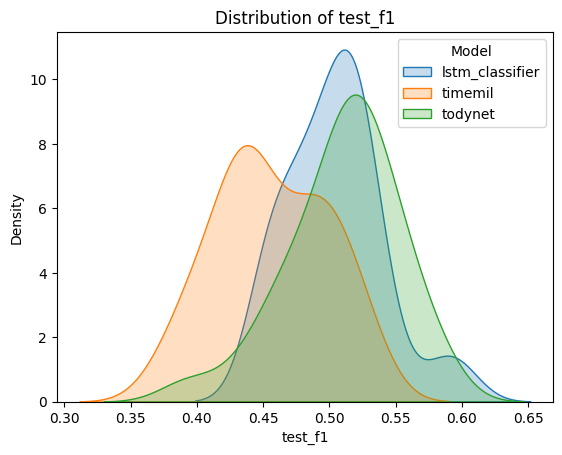


--- ASO Test Results ---


Model comparisons: 100%|█████████▉| 2997/3000 [00:11<00:00, 272.10it/s]


                 lstm_classifier   timemil  todynet
lstm_classifier              1.0  0.000412      1.0
timemil                      1.0  1.000000      1.0
todynet                      1.0  0.008168      1.0


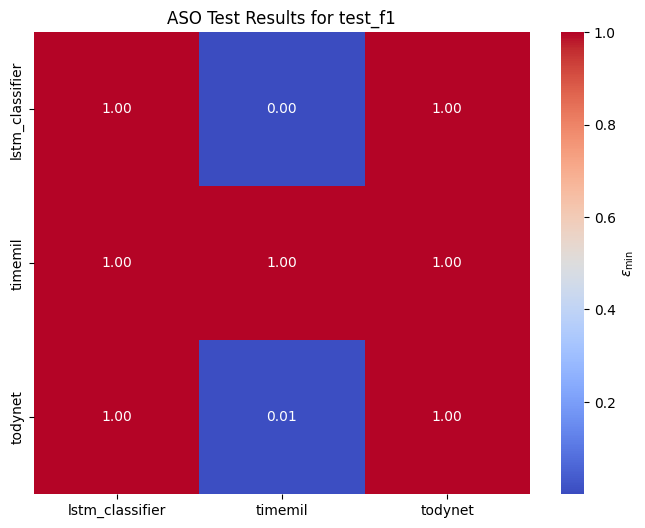

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import shapiro, anderson
# from deepsig import multi_aso

# def analyze_model_performance(dataset_df, metric, confidence_level=0.95, bonferroni=True, seed=42):
#     """
#     Analyze model performance using the ASO test and visualize results.

#     Args:
#         dataset_df (pd.DataFrame): DataFrame containing performance metrics and model information.
#         metric (str): Performance metric to analyze (e.g., 'test_f1').
#         confidence_level (float): Confidence level for the ASO test.
#         bonferroni (bool): Whether to apply Bonferroni correction.
#         seed (int): Random seed for reproducibility.
#     """
#     # Step 1: Group scores by model
#     grouped = dataset_df.groupby('model')[metric].apply(list).to_dict()

#     # Step 2: Check empirical distributions
#     print("\n--- Empirical Distribution Analysis ---")
#     for model, scores in grouped.items():
#         print(f"\nModel: {model}")
#         _, p_value = shapiro(scores)
#         print(f"Shapiro-Wilk Test p-value: {p_value:.4f}")
#         if p_value < 0.05:
#             print("  -> Non-normal distribution detected. Apply non-parametric ASO test.")
#         else:
#             print("  -> Approximately normal distribution. Apply parametric hypothesis test.")

#         # Plot the distribution
#         sns.kdeplot(scores, label=model, fill=True)
#     plt.title(f'Distribution of {metric}')
#     plt.xlabel(metric)
#     plt.legend(title='Model')
#     plt.show()

#     # Step 3: Run ASO Test
#     print("\n--- ASO Test Results ---")
#     scores = {model: np.array(scores) for model, scores in grouped.items()}
#     aso_matrix = multi_aso(scores, confidence_level=confidence_level, return_df=True, use_bonferroni=bonferroni, seed=seed)
#     print(aso_matrix)

#     # Visualize ASO matrix as a heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(aso_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': r'$\epsilon_\text{min}$'})
#     plt.title(f'ASO Test Results for {metric}')
#     plt.show()

#     return aso_matrix


# # Example usage
# # Dataset: Assume `dataset_metrics['rotten']` is loaded
# aso_results = analyze_model_performance(
#     dataset_df=dataset_metrics['rotten'],
#     metric='test_f1',  # Change this to any other metric of interest
#     confidence_level=0.95,
#     bonferroni=True,
#     seed=42
# )



--- Empirical Distributions ---


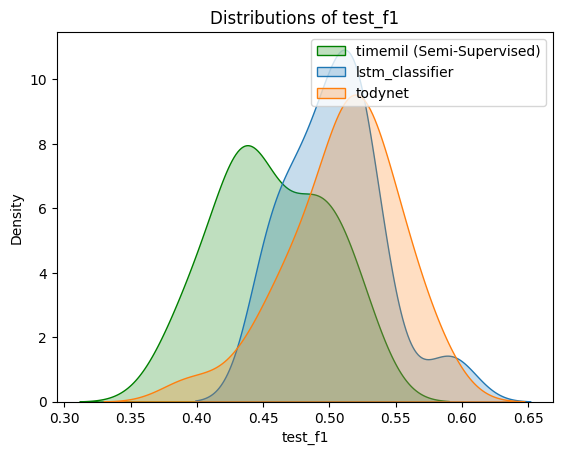

ANOVA Results: F-statistic = 16.1189, p-value = 0.0000
  -> Significant differences detected between models.

Posthoc Tukey HSD Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1      group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
lstm_classifier timemil  -0.0475    0.0 -0.0722 -0.0228   True
lstm_classifier todynet   0.0062 0.8194 -0.0184  0.0309  False
        timemil todynet   0.0537    0.0   0.029  0.0784   True
--------------------------------------------------------------


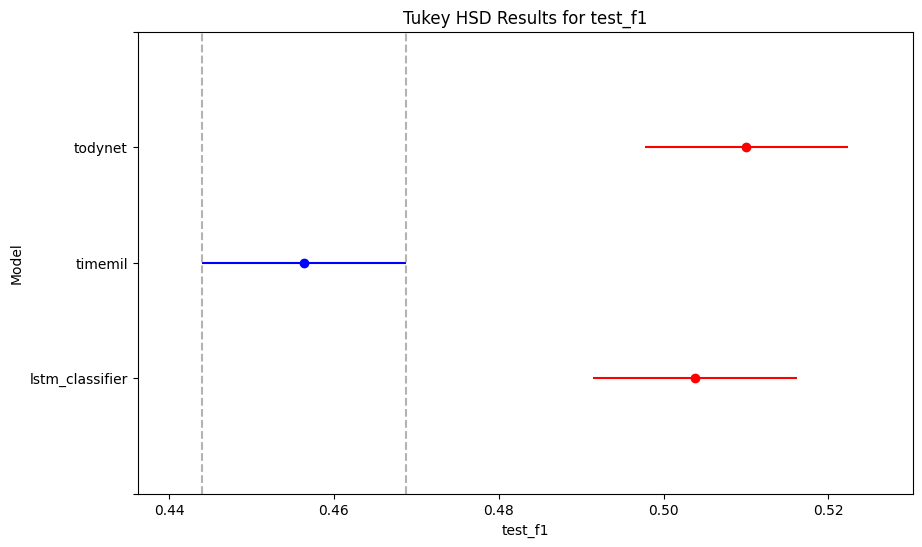


--- Pairwise T-Tests ---
Timemil vs. lstm_classifier: t-statistic = -4.7062, p-value = 0.0000
  -> Significant difference: timemil outperforms lstm_classifier.
Timemil vs. todynet: t-statistic = -4.9436, p-value = 0.0000
  -> Significant difference: timemil outperforms todynet.


In [ ]:
# from scipy.stats import ttest_ind, f_oneway
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# import matplotlib.pyplot as plt
# import seaborn as sns

# def test_semi_supervised_hypothesis(dataset_df, metric, alpha=0.05):
#     """
#     Test the hypothesis that semi-supervised models outperform supervised models.

#     Args:
#         dataset_df (pd.DataFrame): DataFrame containing performance metrics and model information.
#         metric (str): Performance metric to analyze (e.g., 'test_f1').
#         alpha (float): Significance level for hypothesis testing.
#     """
#     semi_supervised = dataset_df[dataset_df['model'] == 'timemil'][metric]
#     supervised = dataset_df[dataset_df['model'].isin(['lstm_classifier', 'todynet'])]

#     # Visualize distributions
#     print("\n--- Empirical Distributions ---")
#     sns.kdeplot(semi_supervised, label='timemil (Semi-Supervised)', fill=True, color='green')
#     for model in ['lstm_classifier', 'todynet']:
#         sns.kdeplot(supervised[supervised['model'] == model][metric], label=model, fill=True)
#     plt.title(f'Distributions of {metric}')
#     plt.xlabel(metric)
#     plt.legend()
#     plt.show()

#     # Perform ANOVA test across all models
#     grouped_scores = [dataset_df[dataset_df['model'] == model][metric].values for model in dataset_df['model'].unique()]
#     f_stat, p_value_anova = f_oneway(*grouped_scores)
#     print(f"ANOVA Results: F-statistic = {f_stat:.4f}, p-value = {p_value_anova:.4f}")
#     if p_value_anova < alpha:
#         print("  -> Significant differences detected between models.")

#         # Perform Tukey HSD posthoc test
#         tukey = pairwise_tukeyhsd(
#             endog=dataset_df[metric],  # Dependent variable
#             groups=dataset_df['model'],  # Grouping variable
#             alpha=alpha
#         )
#         print("\nPosthoc Tukey HSD Test Results:")
#         print(tukey)
#         tukey.plot_simultaneous(comparison_name='timemil', xlabel=metric, ylabel='Model')
#         plt.title(f'Tukey HSD Results for {metric}')
#         plt.show()

#     # Directly compare semi-supervised vs. supervised models (T-Test)
#     print("\n--- Pairwise T-Tests ---")
#     for model in ['lstm_classifier', 'todynet']:
#         supervised_scores = supervised[supervised['model'] == model][metric]
#         t_stat, p_value_ttest = ttest_ind(semi_supervised, supervised_scores, equal_var=False)
#         print(f"Timemil vs. {model}: t-statistic = {t_stat:.4f}, p-value = {p_value_ttest:.4f}")
#         if p_value_ttest < alpha:
#             print(f"  -> Significant difference: timemil outperforms {model}.")
#         else:
#             print(f"  -> No significant difference between timemil and {model}.")

# # Example usage
# test_semi_supervised_hypothesis(dataset_metrics['rotten'], metric='test_f1', alpha=0.05)



--- Empirical Distributions ---


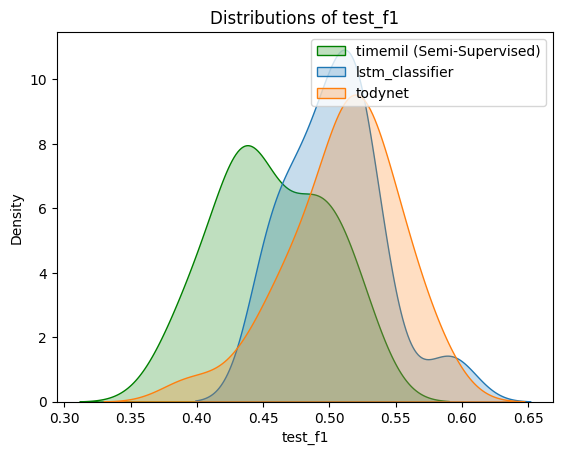

ANOVA Results: F-statistic = 16.1189, p-value = 0.0000
  -> Significant differences detected between models.

Posthoc Tukey HSD Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1      group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
lstm_classifier timemil  -0.0475    0.0 -0.0722 -0.0228   True
lstm_classifier todynet   0.0062 0.8194 -0.0184  0.0309  False
        timemil todynet   0.0537    0.0   0.029  0.0784   True
--------------------------------------------------------------


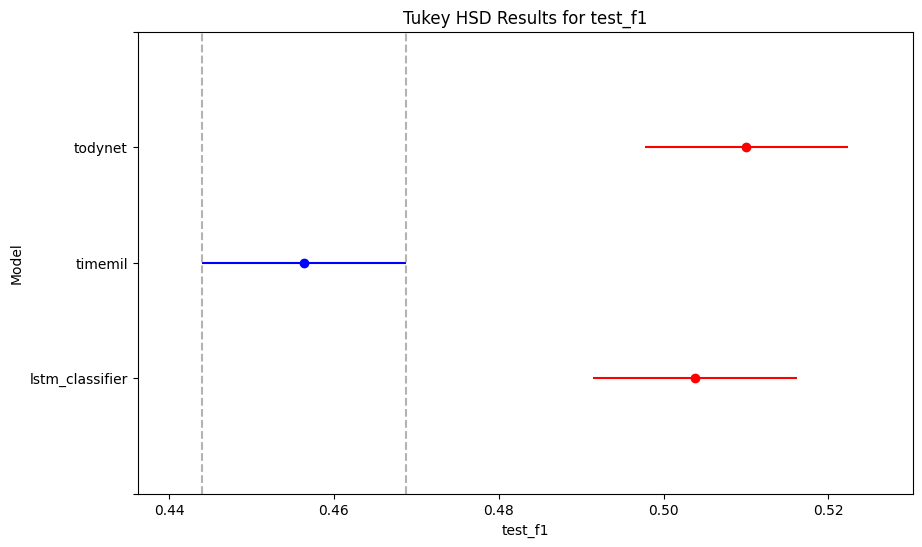


--- Pairwise T-Tests ---
Timemil vs. lstm_classifier: t-statistic = -4.7062, p-value = 0.0000, mean difference = -0.0475
  -> Significant difference: timemil underperforms lstm_classifier.
Timemil vs. todynet: t-statistic = -4.9436, p-value = 0.0000, mean difference = -0.0537
  -> Significant difference: timemil underperforms todynet.


In [ ]:
# from scipy.stats import ttest_ind, f_oneway
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# import matplotlib.pyplot as plt
# import seaborn as sns

# def test_semi_supervised_hypothesis(dataset_df, metric, alpha=0.05):
#     """
#     Test the hypothesis that semi-supervised models outperform supervised models.

#     Args:
#         dataset_df (pd.DataFrame): DataFrame containing performance metrics and model information.
#         metric (str): Performance metric to analyze (e.g., 'test_f1').
#         alpha (float): Significance level for hypothesis testing.
#     """
#     semi_supervised = dataset_df[dataset_df['model'] == 'timemil'][metric]
#     supervised = dataset_df[dataset_df['model'].isin(['lstm_classifier', 'todynet'])]

#     # Visualize distributions
#     print("\n--- Empirical Distributions ---")
#     sns.kdeplot(semi_supervised, label='timemil (Semi-Supervised)', fill=True, color='green')
#     for model in ['lstm_classifier', 'todynet']:
#         sns.kdeplot(supervised[supervised['model'] == model][metric], label=model, fill=True)
#     plt.title(f'Distributions of {metric}')
#     plt.xlabel(metric)
#     plt.legend()
#     plt.show()

#     # Perform ANOVA test across all models
#     grouped_scores = [dataset_df[dataset_df['model'] == model][metric].values for model in dataset_df['model'].unique()]
#     f_stat, p_value_anova = f_oneway(*grouped_scores)
#     print(f"ANOVA Results: F-statistic = {f_stat:.4f}, p-value = {p_value_anova:.4f}")
#     if p_value_anova < alpha:
#         print("  -> Significant differences detected between models.")

#         # Perform Tukey HSD posthoc test
#         tukey = pairwise_tukeyhsd(
#             endog=dataset_df[metric],  # Dependent variable
#             groups=dataset_df['model'],  # Grouping variable
#             alpha=alpha
#         )
#         print("\nPosthoc Tukey HSD Test Results:")
#         print(tukey)
#         tukey.plot_simultaneous(comparison_name='timemil', xlabel=metric, ylabel='Model')
#         plt.title(f'Tukey HSD Results for {metric}')
#         plt.show()

#     # Directly compare semi-supervised vs. supervised models (T-Test)
#     print("\n--- Pairwise T-Tests ---")
#     for model in ['lstm_classifier', 'todynet']:
#         supervised_scores = supervised[supervised['model'] == model][metric]
#         t_stat, p_value_ttest = ttest_ind(semi_supervised, supervised_scores, equal_var=False)
#         mean_difference = semi_supervised.mean() - supervised_scores.mean()
#         print(f"Timemil vs. {model}: t-statistic = {t_stat:.4f}, p-value = {p_value_ttest:.4f}, mean difference = {mean_difference:.4f}")
#         if p_value_ttest < alpha:
#             if mean_difference > 0:
#                 print(f"  -> Significant difference: timemil outperforms {model}.")
#             else:
#                 print(f"  -> Significant difference: timemil underperforms {model}.")
#         else:
#             print(f"  -> No significant difference between timemil and {model}.")

# test_semi_supervised_hypothesis(dataset_metrics['rotten'], metric='test_f1', alpha=0.05)


In [ ]:
dataset_metrics['rotten'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   test_loss       90 non-null     float64
 1   test_acc        90 non-null     float64
 2   test_f1         90 non-null     float64
 3   test_precision  90 non-null     float64
 4   test_recall     90 non-null     float64
 5   test_auc        90 non-null     float64
 6   model           90 non-null     object 
 7   dataset         90 non-null     object 
 8   run             90 non-null     int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 6.5+ KB


# Performance Assessment V2

## 1. Load and Prepare the Data
First, import necessary libraries and load your data into a pandas DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming your DataFrame is already loaded as 'df'
# If not, load it using:
# df = pd.read_csv('your_data.csv')

# colorize print as bold green or bold red
BOLD = '\033[1m'
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
BOLD_GREEN = BOLD + GREEN
BOLD_RED = BOLD + RED
BOLD_RESET = BOLD + RESET

# Display the first few rows
#df = dataset_metrics['twitter']
#print(df.head())

## 2. Descriptive Statistics + Check for normality for metric distributions across models
### Statistics
    Compute the mean and standard deviation of the F1 score and AUC for each model. KDE Plot & Box Plot for Distributions.

### Check for Normality
Use the Shapiro-Wilk test to check if the data is normally distributed.

    Interpretation:

    p > 0.05: Data is normally distributed.

    p ≤ 0.05: Data is not normally distributed.


### Test for Equal Variances
Use Levene’s Test to check for homogeneity of variances.

    Interpretation:

    p > 0.05: Variances are equal.

    p ≤ 0.05: Variances are not equal.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

def compute_stats(df, dataset_name, metric):
    # Group the data by model
    grouped = df.groupby('model')

    # Calculate mean and std for the specified metric
    stats_df = grouped[metric].agg(['mean', 'std']).reset_index()

    # Print the results
    print(f"\n--- {dataset_name} | {metric} ---")
    print(stats_df)
    print("\n")

# Plot the distribution
def plot_distribution(df, data_name, metric_1_name, metric_2_name):
    metrics = [metric_1_name, metric_2_name]

    for metric in metrics:
        # Define colors for each model
        model_colors = {
            'timemil': 'green',
            'todynet': 'purple',
            'lstm_classifier': 'orange'
        }

        # Create a color palette for the models
        palette = {model: color for model, color in model_colors.items()}

        # Compute the stats
        compute_stats(df, data_name, metric)

        # Group scores by model
        grouped = df.groupby('model')[metric].apply(list).to_dict()

        # Empirical Distribution Analysis
        print("--- Empirical Distribution Analysis ---")
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        for model, scores in grouped.items():
            print(f"\nModel: {model}")
            stat, p_value = shapiro(scores)
            print(f"Shapiro-Wilk Test p-value for model {model}: {p_value:.6f}")
            print(f"Shapiro-Wilk Test stat for model {model}: {stat:.6f}")
            if p_value <= 0.05:
                print(f"p-value: {p_value:.4f} <= alpha 0.05 {BOLD_RED}-> Non-normal distribution detected. Apply non-parametric test.{BOLD_RESET}")
            else:
                print(f"p-value: {p_value:.4f} > alpha 0.05 {BOLD_GREEN}-> Approximately normal distribution. Apply parametric hypothesis test.{BOLD_RESET}")

            # Plot the distribution
            sns.kdeplot(
                scores, label=model, ax=ax[0], color=palette[model], fill=True, alpha=0.5
            )

        ax[0].set_title(f'Distribution of {metric} for {data_name} dataset')
        ax[0].set_xlabel(metric)
        ax[0].set_ylabel('Density')
        ax[0].legend(title='Model')

        # Plot boxplot
        sns.boxplot(
            data=df,
            x='model',
            y=metric,
            palette=palette,
            width=0.5,
            ax=ax[1]
        )
        ax[1].set_title(f'Boxplot of {metric} for {data_name} dataset')
        ax[1].set_xlabel('Model')
        ax[1].set_ylabel(metric)
        #ax[1].legend(title='Model')

        plt.tight_layout()
        plt.show()

        # plt.title(f'Distribution of {metric} for {data_name}')
        # plt.xlabel(metric)
        # plt.legend(title='Model')
        # plt.show()

    # creating the kdeplots
    # fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    # ax[0] = sns.kdeplot(df[metric_1_name], label=model, fill=True, ax=ax[0], palette=palette)
    # ax[1] = sns.kdeplot(df[metric_2_name], label=model, fill=True, ax=ax[1], palette=palette)
    # ax[0].set_title(f'Distribution of {metric_1_name}')
    # ax[1].set_title(f'Distribution of {metric_2_name}')
    # ax[0].set_xlabel(metric_1_name)
    # ax[1].set_xlabel(metric_2_name)
    # plt.legend(title='Model')
    # plt.show()
    # plt.close()

# extracting summary statistics for F1 and AUROC
# plot_distribution(dataset_metrics["rotten"], "rotten", "test_f1", "test_auc")
# plot_distribution(dataset_metrics["imdb"], "imdb", "test_f1", "test_auc")
# plot_distribution(dataset_metrics["twitter"], "twitter", "test_f1", "test_auc")

# extracting summary statistics for F1 and AURO
# dataset = "rotten"



In [ ]:
print(dataset_metrics)

{'rotten':     test_loss  test_acc   test_f1  test_precision  test_recall  test_auc  \
0    1.064249  0.485294  0.449843        0.439462     0.479630  0.687566   
1    0.957204  0.514706  0.489710        0.539762     0.505556  0.681728   
2    1.001378  0.470588  0.424292        0.434726     0.429630  0.691401   
3    1.127223  0.529412  0.502404        0.496471     0.516667  0.673947   
4    0.977958  0.485294  0.463819        0.460978     0.468519  0.674918   
..        ...       ...       ...             ...          ...       ...   
85   1.167585  0.455882  0.453071        0.455673     0.455556  0.638330   
86   1.025200  0.485294  0.481836        0.486111     0.485185  0.683750   
87   0.997132  0.514706  0.517312        0.525758     0.520370  0.714018   
88   1.106011  0.485294  0.483404        0.486629     0.490741  0.679663   
89   0.941321  0.544118  0.541946        0.538462     0.550000  0.723106   

              model dataset  run  
0           timemil  rotten    0  
1     


--- twitter | test_f1 ---
             model      mean       std
0  lstm_classifier  0.423803  0.024381
1          timemil  0.503830  0.058547
2          todynet  0.491021  0.035561


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.003892
Shapiro-Wilk Test stat for model lstm_classifier: 0.886044
p-value: 0.0039 <= alpha 0.05 -> Non-normal distribution detected. Apply non-parametric test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.439796
Shapiro-Wilk Test stat for model timemil: 0.966147
p-value: 0.4398 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.181245
Shapiro-Wilk Test stat for model todynet: 0.951130
p-value: 0.1812 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.


<ipython-input-14-cc47077a987f>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


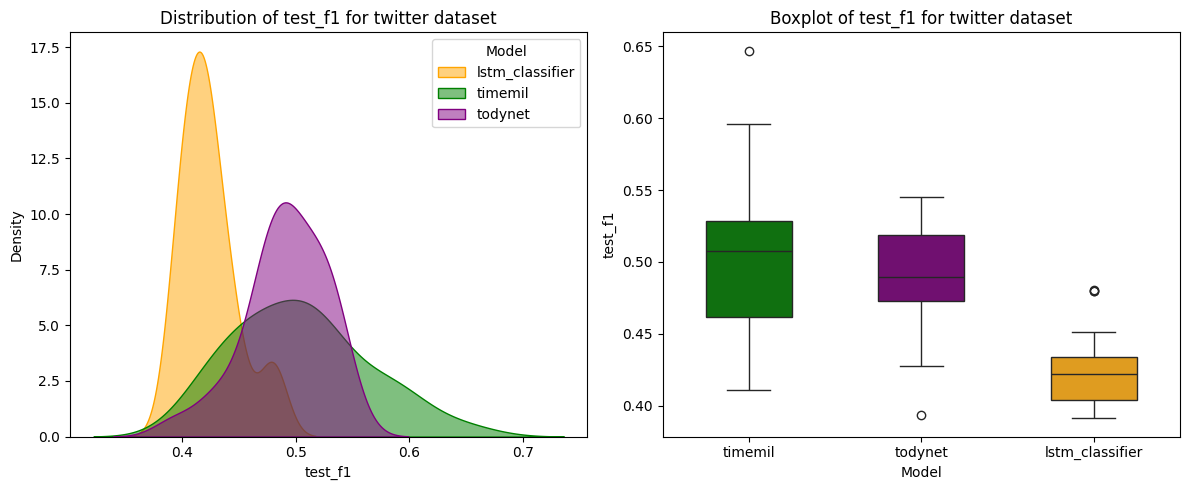


--- twitter | test_auc ---
             model      mean       std
0  lstm_classifier  0.729751  0.005942
1          timemil  0.750273  0.031855
2          todynet  0.750155  0.020091


--- Empirical Distribution Analysis ---

Model: lstm_classifier
Shapiro-Wilk Test p-value for model lstm_classifier: 0.779418
Shapiro-Wilk Test stat for model lstm_classifier: 0.978323
p-value: 0.7794 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: timemil
Shapiro-Wilk Test p-value for model timemil: 0.862295
Shapiro-Wilk Test stat for model timemil: 0.981435
p-value: 0.8623 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.

Model: todynet
Shapiro-Wilk Test p-value for model todynet: 0.872748
Shapiro-Wilk Test stat for model todynet: 0.981868
p-value: 0.8727 > alpha 0.05 -> Approximately normal distribution. Apply parametric hypothesis test.


<ipython-input-14-cc47077a987f>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


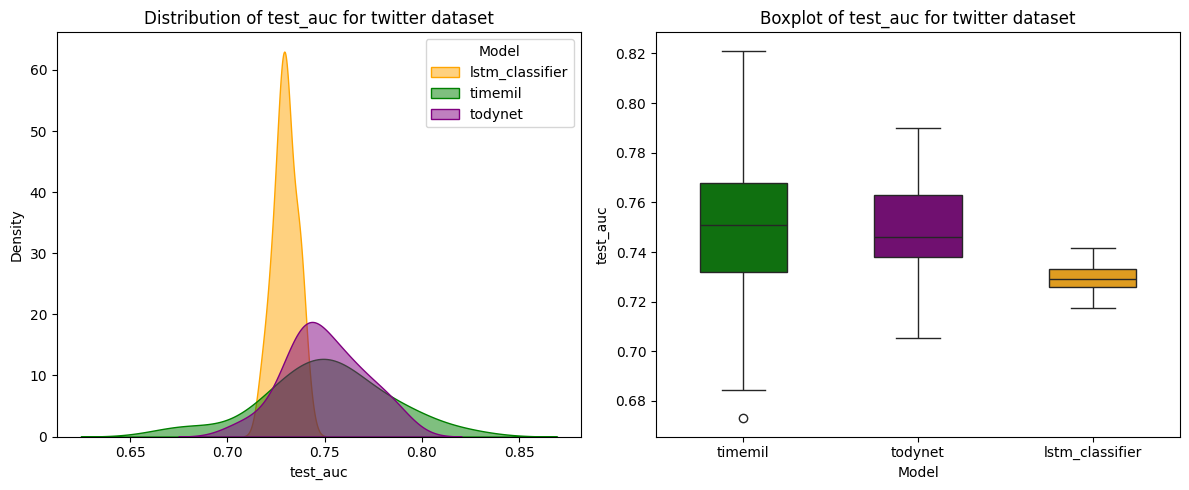


timemil_f1 vs lstm_f1, 0.000155
timemil_f1 vs lstm_f1, stat = 16.388763
timemil_f1 vs lstm_f1 | Variances are not equal

timemil_f1 vs todynet_f1, 0.014783
timemil_f1 vs todynet_f1, stat = 6.313731
timemil_f1 vs todynet_f1 | Variances are not equal

timemil_auc vs lstm_auc, 0.000007
timemil_auc vs lstm_auc, stat = 24.455054
timemil_auc vs lstm_auc | Variances are not equal

timemil_auc vs todynet_auc, 0.087035
timemil_auc vs todynet_auc, stat = 3.030115
timemil_auc vs todynet_auc | Variances are equal


In [ ]:
dataset = "twitter"
# dataset = "twitter"

plot_distribution(dataset_metrics[dataset], dataset, "test_f1", "test_auc")
df = dataset_metrics[dataset]

from scipy.stats import levene

# Separate F1 scores and AUCs for each model
timemil_f1 = df[df['model'] == 'timemil']['test_f1']
lstm_f1 = df[df['model'] == 'lstm_classifier']['test_f1']
todynet_f1 = df[df['model'] == 'todynet']['test_f1']
timemil_auc = df[df['model'] == 'timemil']['test_auc']
lstm_auc = df[df['model'] == 'lstm_classifier']['test_auc']
todynet_auc = df[df['model'] == 'todynet']['test_auc']


# Levene's test for equal variances
results ={
    'timemil_f1 vs lstm_f1': levene(timemil_f1, lstm_f1),
    'timemil_f1 vs todynet_f1': levene(timemil_f1, todynet_f1),
    'timemil_auc vs lstm_auc': levene(timemil_auc, lstm_auc),
    'timemil_auc vs todynet_auc': levene(timemil_auc, todynet_auc),
    #'todynet_f1 vs lstm_f1': levene(todynet_f1, lstm_f1),
    #'todynet_auc vs lstm_auc': levene(todynet_auc, lstm_auc)
}



for name, result in results.items():
    stat, p_value = _, p_value = result
    print(f"\n{name}, {p_value:.6f}")
    print(f"{name}, stat = {stat:.6f}")
    if result.pvalue > 0.05:
        print(f"{BOLD_GREEN}{name} | Variances are equal{BOLD_RESET}")
    else:
        print(f"{BOLD_RED}{name} | Variances are not equal{BOLD_RESET}")

# Assessment of pairwise differences distributions:

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import shapiro

# # Optional ANSI color codes
# BOLD_RED = "\033[1;31m"
# BOLD_GREEN = "\033[1;32m"
# BOLD_BLUE = "\033[1;34m"
# BOLD_RESET = "\033[0m"

# def test_normality_of_differences(dataset_metrics, dataset_name, metric, model_1, model_2):
#     """
#     Tests whether the differences in a given metric between two models
#     follow a normal distribution (Shapiro-Wilk), and plots their distribution.

#     Parameters
#     ----------
#     dataset_metrics : dict
#         Dictionary of datasets, where each key is a dataset name and the value is
#         a DataFrame containing columns: ['model', 'dataset', 'run', <metrics>].
#     dataset_name : str
#         Name of the dataset to look up in dataset_metrics (e.g., 'rotten', 'imdb', 'twitter').
#     metric : str
#         The metric column to compare (e.g., 'test_f1', 'test_auc').
#     model_1 : str
#         Name of the first model (e.g., 'timemil').
#     model_2 : str
#         Name of the second model (e.g., 'todynet').

#     Returns
#     -------
#     float
#         p-value from the Shapiro-Wilk test. If None, indicates that comparison was not possible.
#     """

#     # Print a colored headline
#     print(BOLD_BLUE + f"\n=== Testing Differences in {metric} between {model_1} and {model_2} on {dataset_name} ===" + BOLD_RESET)

#     if dataset_name not in dataset_metrics:
#         print(f"Dataset '{dataset_name}' not found in dataset_metrics.")
#         return None

#     df = dataset_metrics[dataset_name]

#     # Check if metric is in columns
#     if metric not in df.columns:
#         print(f"Metric '{metric}' not found in the DataFrame for {dataset_name}.")
#         return None

#     # Pivot the DataFrame: index = run, columns = model, values = metric
#     pivot_df = df.pivot(index='run', columns='model', values=metric)

#     # Ensure both models are present
#     if model_1 not in pivot_df.columns or model_2 not in pivot_df.columns:
#         print(f"One or both models ('{model_1}', '{model_2}') are not present in the {dataset_name} dataset.")
#         return None

#     # Compute the differences
#     differences = pivot_df[model_2] - pivot_df[model_1]
#     differences = differences.dropna()

#     if differences.empty:
#         print("No valid runs to compare.")
#         return None

#     # Shapiro-Wilk test for normality
#     stat, p_value = shapiro(differences)

#     print(f"Shapiro-Wilk Test Statistic: {stat:.6f}, p-value: {p_value:.6f}")

#     if p_value > 0.05:
#         print(BOLD_GREEN + "Differences appear normally distributed. A parametric test (paired t-test) is suitable." + BOLD_RESET)
#     else:
#         print(BOLD_RED + "Differences do not appear normally distributed. Consider a non-parametric test (Wilcoxon)." + BOLD_RESET)

#     # Plot the distribution of differences
#     fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#     # KDE plot of differences
#     sns.kdeplot(x=differences, ax=axs[0], fill=True, color='blue', alpha=0.5)
#     axs[0].set_title(f'KDE of Differences: {model_2} - {model_1}')
#     axs[0].set_xlabel('Difference')
#     axs[0].set_ylabel('Density')

#     # Boxplot of differences
#     sns.boxplot(x=differences, ax=axs[1], color='blue')
#     axs[1].set_title('Boxplot of Differences')
#     axs[1].set_xlabel('Difference Value')

#     # Add a super-title to figure
#     plt.suptitle(f"Differences in {metric} between {model_2} and {model_1}\nDataset: {dataset_name}", fontweight='bold')
#     plt.tight_layout()
#     plt.show()

#     return p_value

# # Example usage:
# # p_val = test_normality_of_differences(dataset_metrics, "rotten", "test_f1", "timemil", "todynet")
# # p_val = test_normality_of_differences(dataset_metrics, "imdb", "test_auc", "todynet", "lstm_classifier")
# # p_val = test_normality_of_differences(dataset_metrics, "twitter", "test_acc", "timemil", "lstm_classifier")


# # Example usage:
# stat, p_val = test_normality_of_differences(dataset_metrics, "rotten", "test_f1", "timemil", "lstm_classifier")
# # stat, p_val = test_normality_of_differences(dataset_metrics, "rotten", "test_f1", "timemil", "todynet")
# # stat, p_val = test_normality_of_differences(dataset_metrics, "rotten", "test_auc", "timemil", "lstm_classifier")
# # stat, p_val = test_normality_of_differences(dataset_metrics, "rotten", "test_auc", "timemil", "todynet")

# # p_val = test_normality_of_differences(dataset_metrics, "imdb", "test_auc", "todynet", "lstm_classifier")
# # p_val = test_normality_of_differences(dataset_metrics, "twitter", "test_acc", "timemil", "lstm_classifier")


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import shapiro, levene, ttest_rel, wilcoxon
# import pandas as pd

# # Optional ANSI color codes
# BOLD_RED = "\033[1;31m"
# BOLD_GREEN = "\033[1;32m"
# BOLD_BLUE = "\033[1;34m"
# BOLD_RESET = "\033[0m"

# def test_normality_and_variance(dataset_metrics, dataset_name, metric, model_1, model_2):
#     """
#     Tests:
#     - Shapiro-Wilk test for normality on the differences (model_2 - model_1)
#     - Levene's test for equality of variances on the original sets of scores
#     - Depending on normality:
#         - If normal: paired t-test on differences
#         - If not normal: Wilcoxon signed-rank test
#     Also plots the distributions of differences (KDE and Boxplot).

#     Determines which model performs better on average and includes this in the interpretation.

#     Parameters
#     ----------
#     dataset_metrics : dict
#         Dictionary of datasets, each a DataFrame with columns:
#         ['model', 'dataset', 'run', <metrics>]
#     dataset_name : str
#         Name of the dataset (e.g., 'rotten', 'imdb', 'twitter').
#     metric : str
#         The metric column to compare (e.g., 'test_f1', 'test_auc').
#     model_1 : str
#         Name of the first (MIL) model (e.g., 'timemil').
#     model_2 : str
#         Name of the second model to compare to model_1 (e.g., 'todynet').

#     Returns
#     -------
#     dict or None
#         Dictionary with all test results:
#         {
#             'Metric': ...,
#             'MIL-Model': ...,
#             'Compared Model': ...,
#             'Shapiro_stat': ...,
#             'Shapiro_p-value': ...,
#             'Shapiro_interpretation': ...,
#             'Levene_stat': ...,
#             'Levene_p-value': ...,
#             'Levene_interpretation': ...,
#             'Test_used': ...,
#             'Test_stat': ...,
#             'Test_p-value': ...,
#             'Test_interpretation': ...
#         }
#         Returns None if any issue occurs.
#     """
#     print(BOLD_BLUE + f"\n=== Testing Differences in {metric} between {model_1} and {model_2} on {dataset_name} ===" + BOLD_RESET)

#     if dataset_name not in dataset_metrics:
#         print(f"Dataset '{dataset_name}' not found in dataset_metrics.")
#         return None

#     df = dataset_metrics[dataset_name]

#     if metric not in df.columns:
#         print(f"Metric '{metric}' not found in the DataFrame for {dataset_name}.")
#         return None

#     # Pivot to align runs
#     pivot_df = df.pivot(index='run', columns='model', values=metric)

#     if model_1 not in pivot_df.columns or model_2 not in pivot_df.columns:
#         print(f"One or both models ('{model_1}', '{model_2}') are not present in the {dataset_name} dataset.")
#         return None

#     # Extract values
#     values_model_1 = pivot_df[model_1].dropna()
#     values_model_2 = pivot_df[model_2].dropna()

#     # Align indices and compute differences: model_2 - model_1
#     differences = values_model_2.reindex(values_model_1.index, fill_value=pd.NA) - values_model_1
#     differences = differences.dropna()
#     if differences.empty:
#         print("No valid runs to compare differences.")
#         return None

#     # Check which model performs better on average
#     mean_diff = differences.mean()
#     if mean_diff > 0:
#         better_model = model_2
#         worse_model = model_1
#     elif mean_diff < 0:
#         better_model = model_1
#         worse_model = model_2
#     else:
#         better_model = None
#         worse_model = None

#     # Shapiro-Wilk test on differences
#     shapiro_stat, shapiro_p = shapiro(differences)
#     print(f"Shapiro-Wilk Test: stat = {shapiro_stat:.6f}, p-value = {shapiro_p:.6f}")
#     if shapiro_p > 0.05:
#         shapiro_interpretation = "Differences appear normally distributed. Parametric test (paired t-test) is suitable."
#         print(BOLD_GREEN + shapiro_interpretation + BOLD_RESET)
#         normal_distribution = True
#     else:
#         shapiro_interpretation = "Differences not normally distributed. Consider non-parametric test (Wilcoxon)."
#         print(BOLD_RED + shapiro_interpretation + BOLD_RESET)
#         normal_distribution = False

#     # Levene's test for equal variances
#     levene_stat, levene_p = levene(values_model_1, values_model_2, center='mean')
#     print(f"Levene's Test for Equal Variances: stat = {levene_stat:.6f}, p-value = {levene_p:.6f}")
#     if levene_p > 0.05:
#         levene_interpretation = "Variances are not significantly different. Equal variance assumption is reasonable."
#         print(BOLD_GREEN + levene_interpretation + BOLD_RESET)
#     else:
#         levene_interpretation = "Variances differ significantly. Equal variance assumption may not hold."
#         print(BOLD_RED + levene_interpretation + BOLD_RESET)

#     # Perform paired test depending on normality
#     if normal_distribution:
#         # Paired t-test
#         test_used = "paired t-test"
#         test_stat, test_p = ttest_rel(values_model_2, values_model_1, nan_policy='omit')
#     else:
#         # Wilcoxon signed-rank test
#         test_used = "Wilcoxon signed-rank test"
#         # note: zero_method='wilcox' requires no zeros difference if less than 20 pairs
#         test_stat, test_p = wilcoxon(values_model_2, values_model_1, zero_method='wilcox')

#     # Interpret the hypothesis test
#     if test_p < 0.05:
#         # Significant difference
#         if better_model is not None:
#             test_interpretation = f"Significant difference found. {better_model} performs better than {worse_model} on average."
#         else:
#             test_interpretation = "Significant difference found, but mean difference is zero (unlikely)."
#     else:
#         # No significant difference
#         test_interpretation = "No significant difference found. Both models perform similarly."

#     print(BOLD_BLUE + f"{test_used.capitalize()} result: stat={test_stat:.6f}, p-value={test_p:.6f}" + BOLD_RESET)
#     if test_p < 0.05:
#         print(BOLD_GREEN + test_interpretation + BOLD_RESET)
#     else:
#         print(BOLD_RED + test_interpretation + BOLD_RESET)

#     # Plot the distribution of differences
#     fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#     # KDE plot of differences
#     sns.kdeplot(x=differences, ax=axs[0], fill=True, color='blue', alpha=0.5)
#     axs[0].set_title(f'KDE of Differences: {model_2} - {model_1}')
#     axs[0].set_xlabel('Difference')
#     axs[0].set_ylabel('Density')

#     # Boxplot of differences
#     sns.boxplot(x=differences, ax=axs[1], color='blue')
#     axs[1].set_title('Boxplot of Differences')
#     axs[1].set_xlabel('Difference Value')

#     # Add a super-title
#     plt.suptitle(f"Differences in {metric} between {model_2} and {model_1}\nDataset: {dataset_name}", fontweight='bold')
#     plt.tight_layout()
#     plt.show()

#     # Prepare the result dict
#     result = {
#         'Metric': metric,
#         'MIL-Model': model_1,
#         'Compared Model': model_2,
#         'Shapiro_stat': shapiro_stat,
#         'Shapiro_p-value': shapiro_p,
#         'Shapiro_interpretation': shapiro_interpretation,
#         'Levene_stat': levene_stat,
#         'Levene_p-value': levene_p,
#         'Levene_interpretation': levene_interpretation,
#         'Test_used': test_used,
#         'Test_stat': test_stat,
#         'Test_p-value': test_p,
#         'Test_interpretation': test_interpretation
#     }

#     return result

# def run_all_comparisons_with_levene(dataset_metrics, output_path):
#     """
#     Runs all requested comparisons of differences between models, performs Shapiro, Levene,
#     and paired hypothesis tests (t-test or Wilcoxon depending on normality),
#     and saves results into an Excel file.

#     Comparisons:
#     - Datasets: rotten, imdb, twitter
#     - Metrics: F1 (test_f1), AUROC (test_auc)
#     - Model pairs:
#         timemil vs lstm_classifier
#         timemil vs todynet
#     """
#     datasets = ['rotten', 'imdb', 'twitter']
#     metrics = {
#         'F1': 'test_f1',
#         'AUROC': 'test_auc'
#     }
#     pairs = [
#         ('timemil', 'lstm_classifier'),
#         ('timemil', 'todynet')
#     ]

#     results = []

#     for ds in datasets:
#         for metric_name, metric_col in metrics.items():
#             for m1, m2 in pairs:
#                 res = test_normality_and_variance(dataset_metrics, ds, metric_col, m1, m2)
#                 if res is not None:
#                     # Adjust the Metric field to the human-readable name (F1 or AUROC)
#                     res['Metric'] = metric_name
#                     results.append(res)

#     # Convert to DataFrame
#     results_df = pd.DataFrame(results, columns=[
#         'Metric',
#         'MIL-Model',
#         'Compared Model',
#         'Shapiro_stat',
#         'Shapiro_p-value',
#         'Shapiro_interpretation',
#         'Levene_stat',
#         'Levene_p-value',
#         'Levene_interpretation',
#         'Test_used',
#         'Test_stat',
#         'Test_p-value',
#         'Test_interpretation'
#     ])

#     results_df.to_excel(output_path, index=False)
#     print(BOLD_BLUE + f"\nResults with Shapiro, Levene, and paired tests saved to {output_path}" + BOLD_RESET)


# # Example usage:
# output_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/shapiro_comparison_results.xlsx"
# run_all_comparisons_with_levene(dataset_metrics, output_path)



=== Testing Differences in test_f1 between timemil and lstm_classifier on rotten ===
Shapiro-Wilk Test: stat = 0.964796, p-value = 0.408113
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 2.114411, p-value = 0.151308
Variances are not significantly different. Equal variance assumption is reasonable.
Paired t-test result: stat=4.567627, p-value=0.000084
Significant difference found. lstm_classifier performs better than timemil on average.


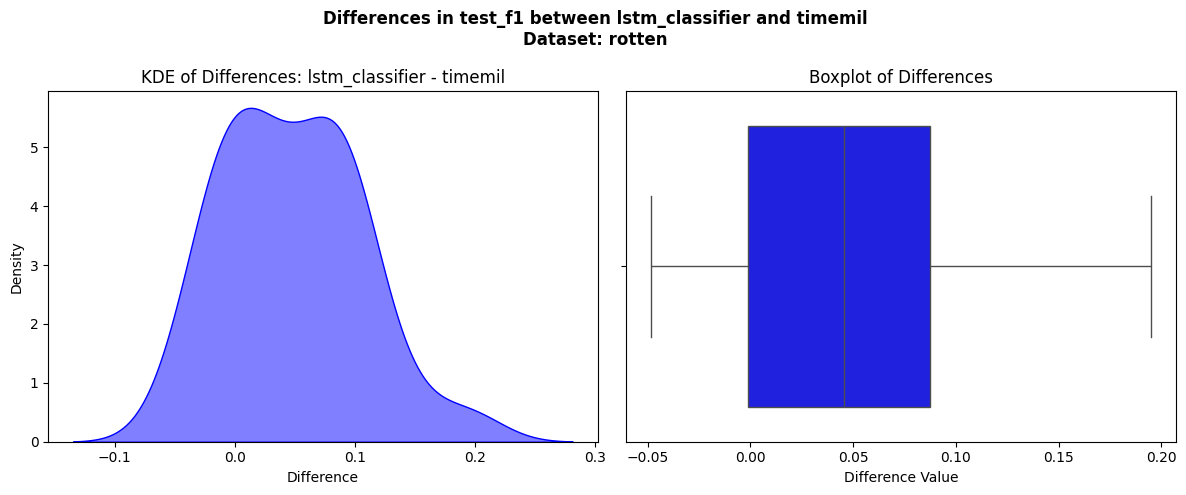

rotten

=== Testing Differences in test_f1 between timemil and todynet on rotten ===
Shapiro-Wilk Test: stat = 0.960668, p-value = 0.322163
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 0.364396, p-value = 0.548429
Variances are not significantly different. Equal variance assumption is reasonable.
Paired t-test result: stat=5.052662, p-value=0.000022
Significant difference found. todynet performs better than timemil on average.


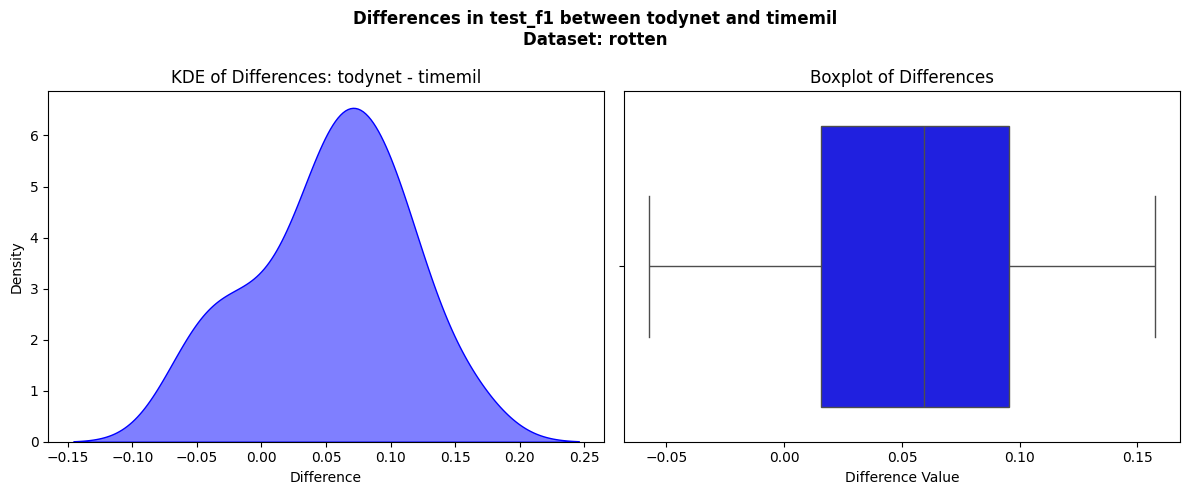

rotten

=== Testing Differences in test_auc between timemil and lstm_classifier on rotten ===
Shapiro-Wilk Test: stat = 0.984284, p-value = 0.924373
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 5.327135, p-value = 0.024582
Variances differ significantly. Equal variance assumption may not hold.
Paired t-test result: stat=5.223926, p-value=0.000014
Significant difference found. lstm_classifier performs better than timemil on average.


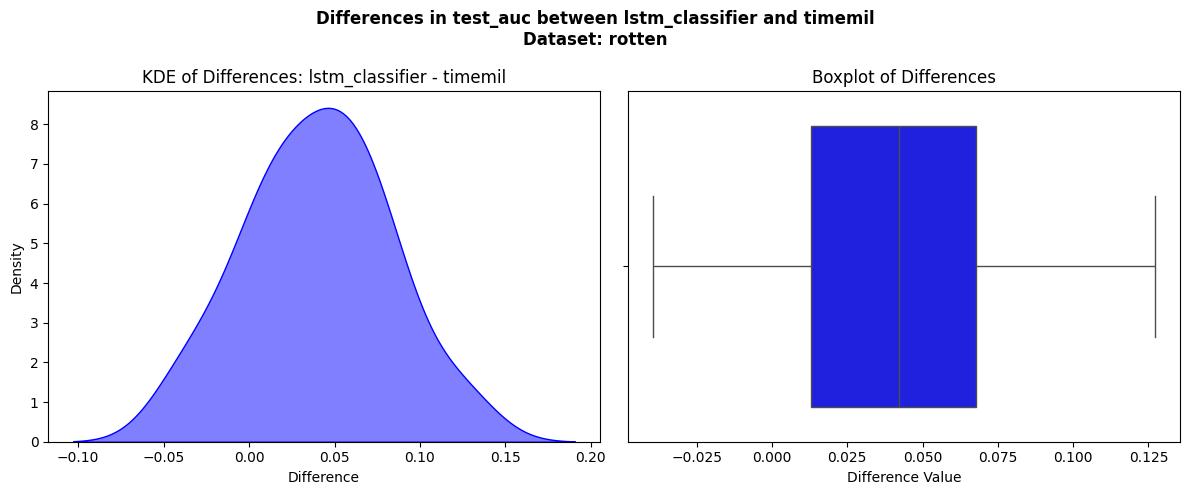

rotten

=== Testing Differences in test_auc between timemil and todynet on rotten ===
Shapiro-Wilk Test: stat = 0.974556, p-value = 0.669637
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 5.494719, p-value = 0.022521
Variances differ significantly. Equal variance assumption may not hold.
Paired t-test result: stat=11.748088, p-value=0.000000
Significant difference found. todynet performs better than timemil on average.


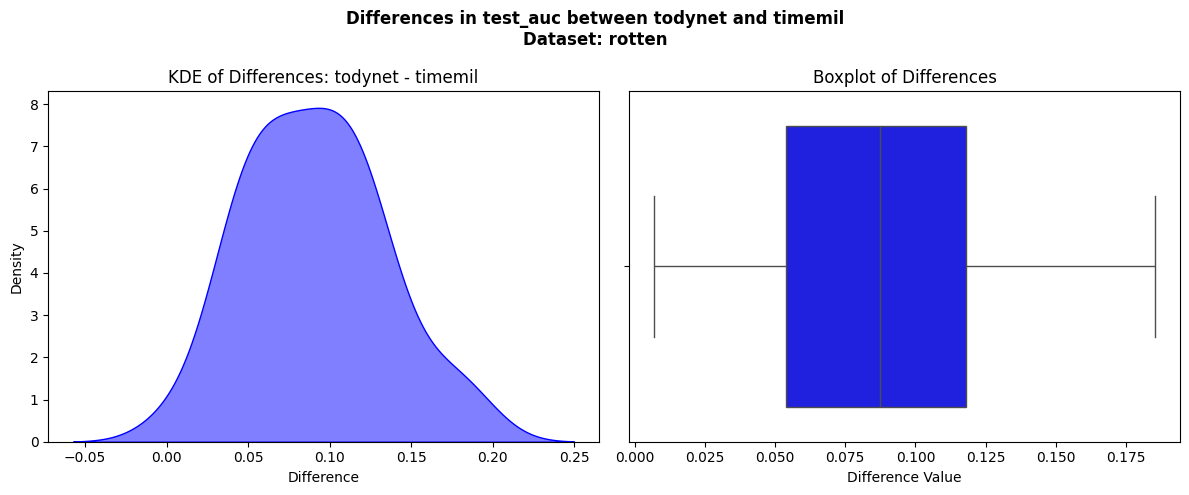

rotten

=== Testing Differences in test_f1 between timemil and lstm_classifier on imdb ===
Shapiro-Wilk Test: stat = 0.960792, p-value = 0.324507
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 28.239062, p-value = 0.000002
Variances differ significantly. Equal variance assumption may not hold.
Paired t-test result: stat=14.343855, p-value=0.000000
Significant difference found. lstm_classifier performs better than timemil on average.


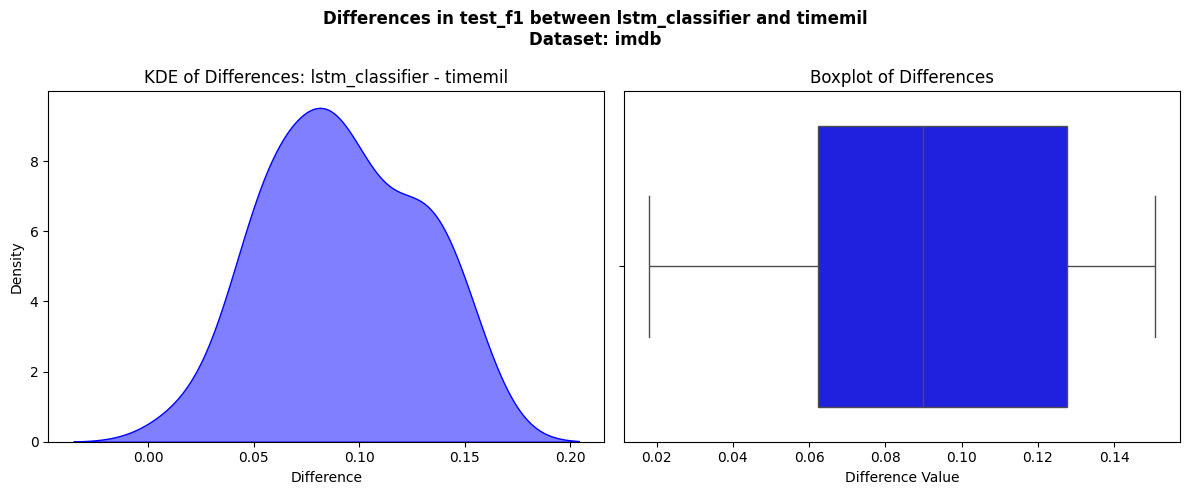

imdb

=== Testing Differences in test_f1 between timemil and todynet on imdb ===
Shapiro-Wilk Test: stat = 0.982057, p-value = 0.877212
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 2.009850, p-value = 0.161631
Variances are not significantly different. Equal variance assumption is reasonable.
Paired t-test result: stat=7.637698, p-value=0.000000
Significant difference found. todynet performs better than timemil on average.


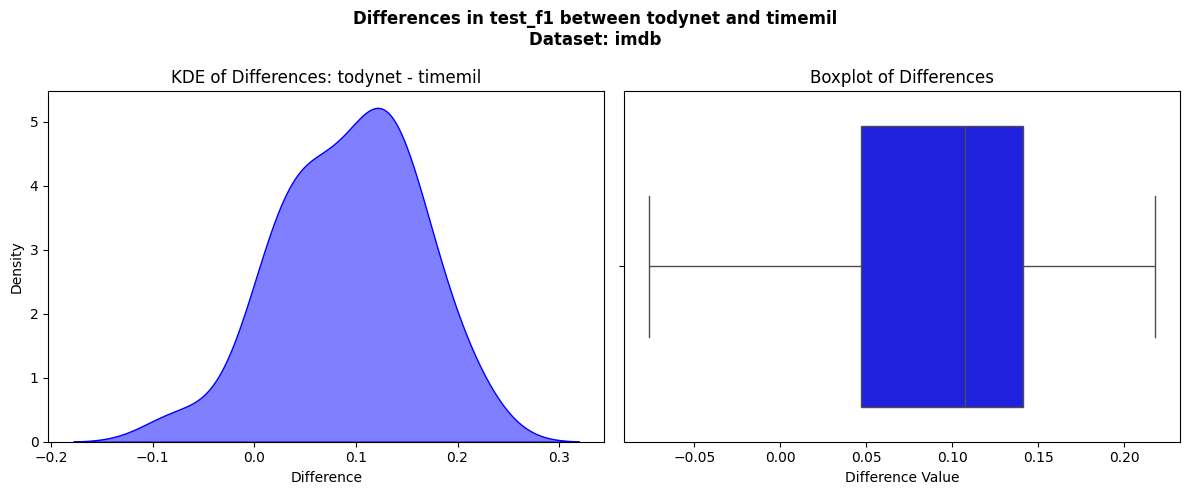

imdb

=== Testing Differences in test_auc between timemil and lstm_classifier on imdb ===
Shapiro-Wilk Test: stat = 0.965430, p-value = 0.422762
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 47.782671, p-value = 0.000000
Variances differ significantly. Equal variance assumption may not hold.
Paired t-test result: stat=15.373699, p-value=0.000000
Significant difference found. lstm_classifier performs better than timemil on average.


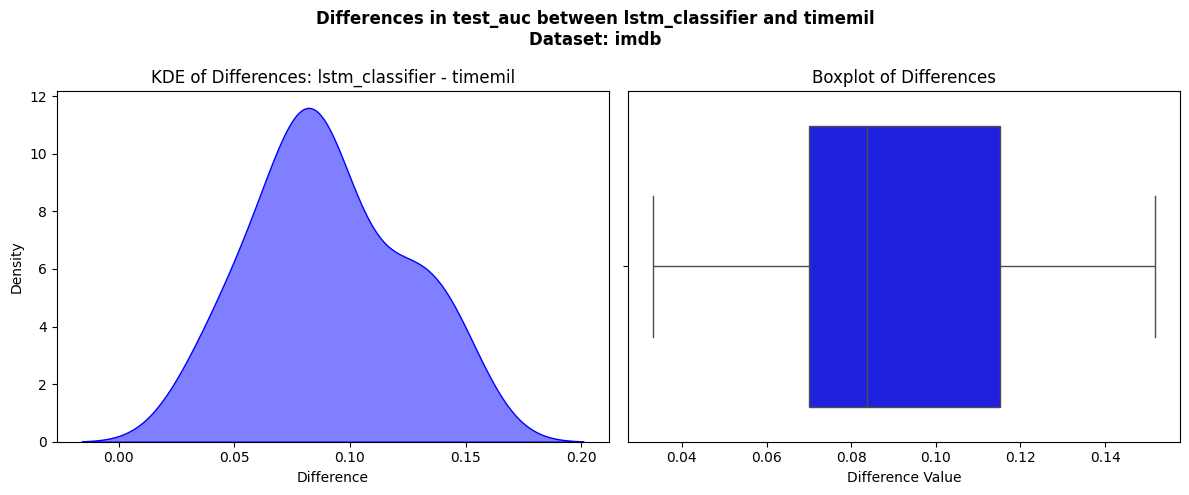

imdb

=== Testing Differences in test_auc between timemil and todynet on imdb ===
Shapiro-Wilk Test: stat = 0.977455, p-value = 0.754623
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 17.824630, p-value = 0.000086
Variances differ significantly. Equal variance assumption may not hold.
Paired t-test result: stat=16.610856, p-value=0.000000
Significant difference found. todynet performs better than timemil on average.


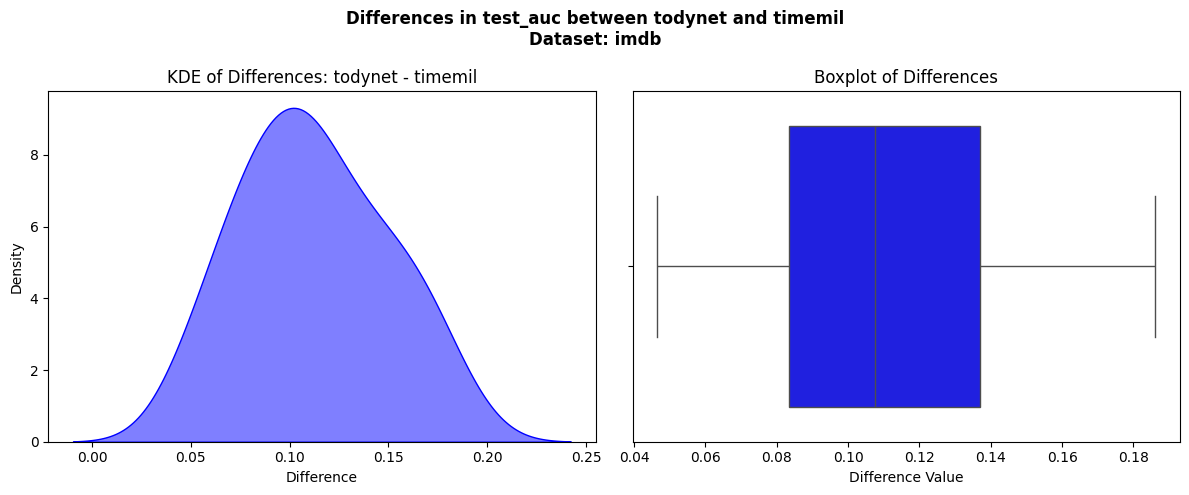

imdb

=== Testing Differences in test_f1 between timemil and lstm_classifier on twitter ===
Shapiro-Wilk Test: stat = 0.981017, p-value = 0.851907
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 16.485307, p-value = 0.000149
Variances differ significantly. Equal variance assumption may not hold.
Paired t-test result: stat=-6.602306, p-value=0.000000
Significant difference found. timemil performs better than lstm_classifier on average.


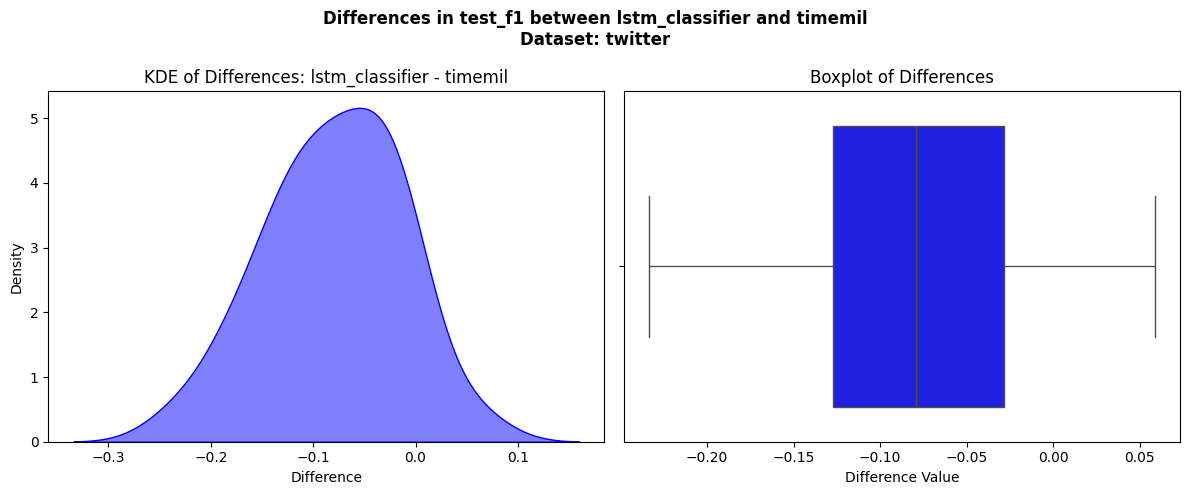

twitter

=== Testing Differences in test_f1 between timemil and todynet on twitter ===
Shapiro-Wilk Test: stat = 0.965811, p-value = 0.431763
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 6.440839, p-value = 0.013861
Variances differ significantly. Equal variance assumption may not hold.
Paired t-test result: stat=-1.030041, p-value=0.311506
No significant difference found. Both models perform similarly.


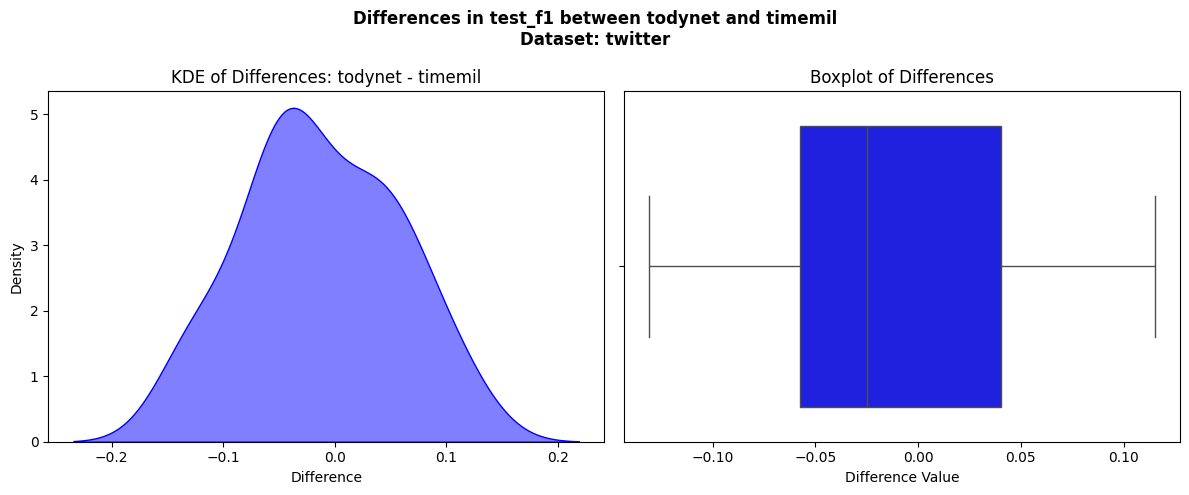

twitter

=== Testing Differences in test_auc between timemil and lstm_classifier on twitter ===
Shapiro-Wilk Test: stat = 0.967761, p-value = 0.479879
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 24.449244, p-value = 0.000007
Variances differ significantly. Equal variance assumption may not hold.
Paired t-test result: stat=-3.275135, p-value=0.002737
Significant difference found. timemil performs better than lstm_classifier on average.


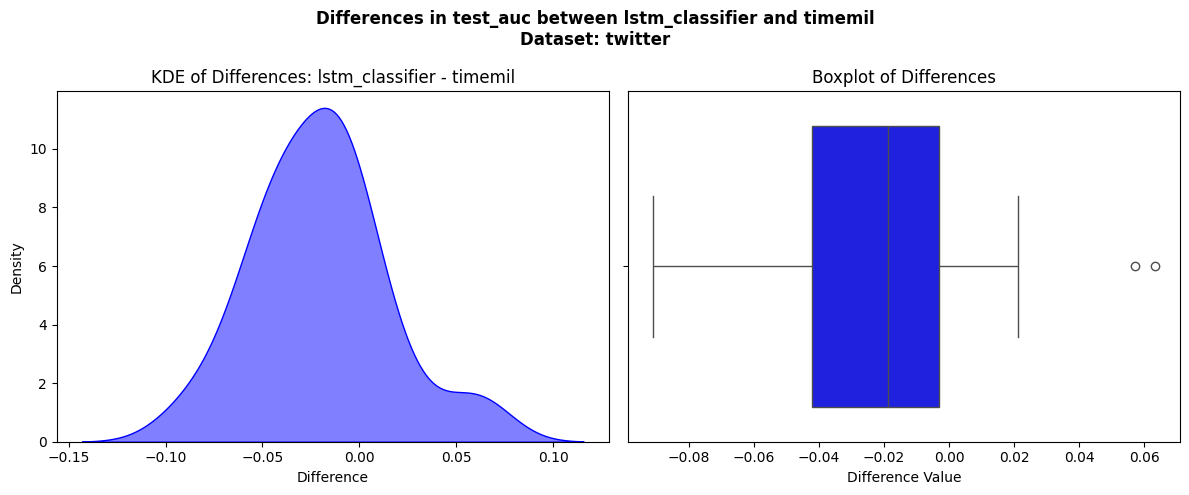

twitter

=== Testing Differences in test_auc between timemil and todynet on twitter ===
Shapiro-Wilk Test: stat = 0.982974, p-value = 0.897890
Differences appear normally distributed. Parametric test (paired t-test) is suitable.
Levene's Test for Equal Variances: stat = 3.017408, p-value = 0.087683
Variances are not significantly different. Equal variance assumption is reasonable.
Paired t-test result: stat=-0.018547, p-value=0.985330
No significant difference found. Both models perform similarly.


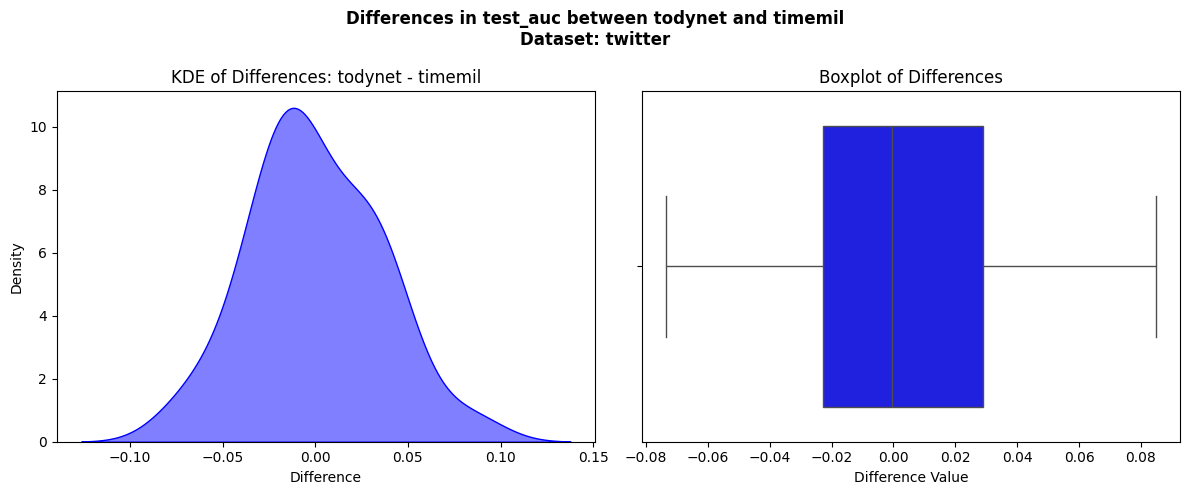

twitter

Results with Shapiro, Levene, paired tests, and Bonferroni correction saved to /content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/shapiro_comparison_results_with_ttest_wilcoxon_bonferroni.xlsx


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_rel, wilcoxon
import pandas as pd

# Optional ANSI color codes
BOLD_RED = "\033[1;31m"
BOLD_GREEN = "\033[1;32m"
BOLD_BLUE = "\033[1;34m"
BOLD_RESET = "\033[0m"

def test_normality_and_variance(dataset_metrics, dataset_name, metric, model_1, model_2):
    """
    Tests:
    - Shapiro-Wilk test for normality on the differences (model_2 - model_1)
    - Levene's test for equality of variances on the original sets of scores
    - Depending on normality:
        - If normal: paired t-test on differences
        - If not normal: Wilcoxon signed-rank test
    Also plots the distributions and determines which model performs better on average.

    Returns a dictionary of results or None if an issue occurs.
    """
    print(BOLD_BLUE + f"\n=== Testing Differences in {metric} between {model_1} and {model_2} on {dataset_name} ===" + BOLD_RESET)

    if dataset_name not in dataset_metrics:
        print(f"Dataset '{dataset_name}' not found in dataset_metrics.")
        return None

    df = dataset_metrics[dataset_name]

    if metric not in df.columns:
        print(f"Metric '{metric}' not found in the DataFrame for {dataset_name}.")
        return None

    # Pivot to align runs
    pivot_df = df.pivot(index='run', columns='model', values=metric)

    if model_1 not in pivot_df.columns or model_2 not in pivot_df.columns:
        print(f"One or both models ('{model_1}', '{model_2}') are not present in the {dataset_name} dataset.")
        return None

    # Extract values
    values_model_1 = pivot_df[model_1].dropna()
    values_model_2 = pivot_df[model_2].dropna()

    # For Shapiro test: compute differences model_2 - model_1
    differences = values_model_2.reindex(values_model_1.index, fill_value=pd.NA) - values_model_1
    differences = differences.dropna()
    if differences.empty:
        print("No valid runs to compare differences.")
        return None

    # Check which model performs better on average
    mean_diff = differences.mean()
    if mean_diff > 0:
        better_model = model_2
        worse_model = model_1
    elif mean_diff < 0:
        better_model = model_1
        worse_model = model_2
    else:
        better_model = None
        worse_model = None

    # Shapiro-Wilk test on differences
    shapiro_stat, shapiro_p = shapiro(differences)
    print(f"Shapiro-Wilk Test: stat = {shapiro_stat:.6f}, p-value = {shapiro_p:.6f}")
    if shapiro_p > 0.05:
        shapiro_interpretation = "Differences appear normally distributed. Parametric test (paired t-test) is suitable."
        print(BOLD_GREEN + shapiro_interpretation + BOLD_RESET)
        normal_distribution = True
    else:
        shapiro_interpretation = "Differences not normally distributed. Consider non-parametric test (Wilcoxon)."
        print(BOLD_RED + shapiro_interpretation + BOLD_RESET)
        normal_distribution = False

    # Levene's test for equal variances
    levene_stat, levene_p = levene(values_model_1, values_model_2, center='mean')
    print(f"Levene's Test for Equal Variances: stat = {levene_stat:.6f}, p-value = {levene_p:.6f}")
    if levene_p > 0.05:
        levene_interpretation = "Variances are not significantly different. Equal variance assumption is reasonable."
        print(BOLD_GREEN + levene_interpretation + BOLD_RESET)
    else:
        levene_interpretation = "Variances differ significantly. Equal variance assumption may not hold."
        print(BOLD_RED + levene_interpretation + BOLD_RESET)

    # Perform paired test depending on normality
    if normal_distribution:
        # Paired t-test
        test_used = "paired t-test"
        test_stat, test_p = ttest_rel(values_model_2, values_model_1, nan_policy='omit')
    else:
        # Wilcoxon signed-rank test
        test_used = "Wilcoxon signed-rank test"
        test_stat, test_p = wilcoxon(values_model_2, values_model_1, zero_method='wilcox')

    # Interpret the hypothesis test
    if test_p < 0.05:
        # Significant difference
        if better_model is not None:
            test_interpretation = f"Significant difference found. {better_model} performs better than {worse_model} on average."
        else:
            test_interpretation = "Significant difference found, but mean difference is zero (check data)."
    else:
        # No significant difference
        test_interpretation = "No significant difference found. Both models perform similarly."

    print(BOLD_BLUE + f"{test_used.capitalize()} result: stat={test_stat:.6f}, p-value={test_p:.6f}" + BOLD_RESET)
    if test_p < 0.05:
        print(BOLD_GREEN + test_interpretation + BOLD_RESET)
    else:
        print(BOLD_RED + test_interpretation + BOLD_RESET)

    # Plot the distribution of differences
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # KDE plot of differences
    sns.kdeplot(x=differences, ax=axs[0], fill=True, color='blue', alpha=0.5)
    axs[0].set_title(f'KDE of Differences: {model_2} - {model_1}')
    axs[0].set_xlabel('Difference')
    axs[0].set_ylabel('Density')

    # Boxplot of differences
    sns.boxplot(x=differences, ax=axs[1], color='blue')
    axs[1].set_title('Boxplot of Differences')
    axs[1].set_xlabel('Difference Value')

    # Add a super-title
    plt.suptitle(f"Differences in {metric} between {model_2} and {model_1}\nDataset: {dataset_name}", fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(dataset_name)
    # Prepare the result dict
    result = {
        'Dataset': dataset_name,
        'Metric': metric,
        'MIL-Model': model_1,
        'Compared Model': model_2,
        'Shapiro_stat': shapiro_stat,
        'Shapiro_p-value': shapiro_p,
        'Shapiro_interpretation': shapiro_interpretation,
        'Levene_stat': levene_stat,
        'Levene_p-value': levene_p,
        'Levene_interpretation': levene_interpretation,
        'Test_used': test_used,
        'Test_stat': test_stat,
        'Test_p-value': test_p,
        'Test_interpretation': test_interpretation
    }

    return result

def run_all_comparisons_with_levene(dataset_metrics, output_path):
    """
    Runs all requested comparisons of differences between models, performs Shapiro, Levene,
    and paired hypothesis tests (t-test or Wilcoxon depending on normality),
    then applies Bonferroni correction to the final test p-values across all comparisons,
    and saves results into an Excel file.

    Comparisons:
    - Datasets: rotten, imdb, twitter
    - Metrics: F1 (test_f1), AUROC (test_auc)
    - Model pairs:
        timemil vs lstm_classifier
        timemil vs todynet
    """

    datasets = ['rotten', 'imdb', 'twitter']
    metrics = {
        'F1': 'test_f1',
        'AUROC': 'test_auc'
    }
    pairs = [
        ('timemil', 'lstm_classifier'),
        ('timemil', 'todynet')
    ]

    results = []

    # Run all comparisons
    for ds in datasets:
        for metric_name, metric_col in metrics.items():
            for m1, m2 in pairs:
                res = test_normality_and_variance(dataset_metrics, ds, metric_col, m1, m2)
                if res is not None:
                    # Adjust the Metric field to the human-readable name (F1 or AUROC)
                    res['Dataset'] = ds
                    res['Metric'] = metric_name
                    results.append(res)

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results, columns=[
        "Dataset",
        'Metric',
        'MIL-Model',
        'Compared Model',
        'Shapiro_stat',
        'Shapiro_p-value',
        'Shapiro_interpretation',
        'Levene_stat',
        'Levene_p-value',
        'Levene_interpretation',
        'Test_used',
        'Test_stat',
        'Test_p-value',
        'Test_interpretation'
    ])

    # Apply Bonferroni correction to the final test p-values
    n_tests = len(results_df)
    # Bonferroni correction: multiply p-values by number of tests, cap at 1
    bonferroni_corrected_p = results_df['Test_p-value'] * n_tests
    bonferroni_corrected_p = bonferroni_corrected_p.clip(upper=1.0)

    results_df['Bonferroni_corrected_p-value'] = bonferroni_corrected_p

    # Interpretation after Bonferroni correction
    corrected_interpretations = []
    for i, row in results_df.iterrows():
        p = row['Bonferroni_corrected_p-value']
        if p < 0.05:
            # Still significant after correction
            if "performs better" in row['Test_interpretation']:
                corrected_interpretations.append(row['Test_interpretation'] + " (significant after Bonferroni correction)")
            else:
                corrected_interpretations.append("Significant difference found after Bonferroni correction.")
        else:
            # No longer significant after correction
            corrected_interpretations.append("No significant difference after Bonferroni correction.")

    results_df['Bonferroni_interpretation'] = corrected_interpretations

    # Save to Excel
    results_df.to_excel(output_path, index=False)
    print(BOLD_BLUE + f"\nResults with Shapiro, Levene, paired tests, and Bonferroni correction saved to {output_path}" + BOLD_RESET)


# Example usage:
output_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/results/shapiro_comparison_results_with_ttest_wilcoxon_bonferroni.xlsx"
run_all_comparisons_with_levene(dataset_metrics, output_path)


<ipython-input-34-c5d9cb92ca43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-c5d9cb92ca43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-c5d9cb92ca43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


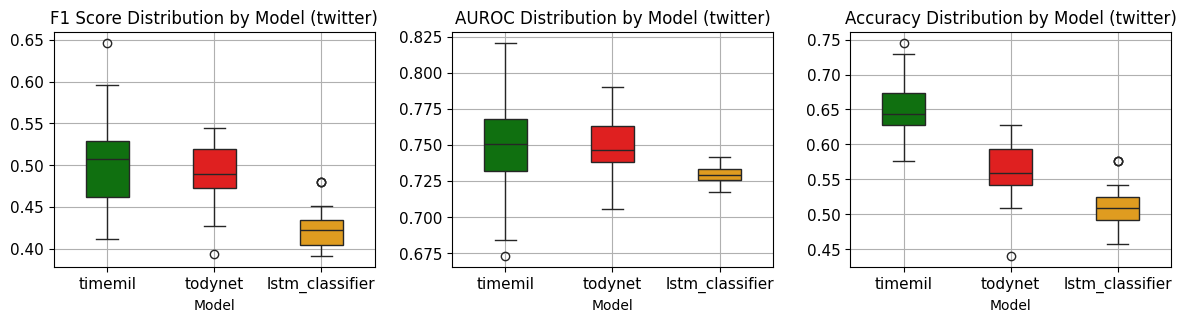

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metrics_boxplots(dataset_df, dataset_name, metrics, models, model_colors):
    """
    Creates a single figure with three boxplots, each for one metric, comparing the performance of different models.

    Parameters:
        dataset_df (pd.DataFrame): DataFrame containing the performance metrics.
        dataset_name (str): Name of the dataset for labeling.
        metrics (list): List of metric names to plot (e.g., ['test_acc', 'test_f1', 'test_auc']).
        models (list): List of model names to include in the plots.
        model_colors (dict): A dictionary mapping model names to specific colors (e.g., {'timemil': 'green', ...}).
    """
    # Create a color palette for the models
    palette = {model: color for model, color in model_colors.items()}

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 3.5), sharey=False)

    metrics = {
        'test_f1': 'F1 Score',
        'test_auc': 'AUROC',
        'test_acc': 'Accuracy'
    }

    for i, metric in enumerate(metrics):
        sns.boxplot(
            data=dataset_df,
            x='model',
            y=metric,
            ax=axes[i],
            palette=palette,
            width=0.4
        )
        axes[i].set_title(f'{metrics[metric]} Distribution by Model ({dataset_name})', fontsize=12)
        axes[i].set_xlabel('Model')
        axes[i].set_ylabel(None) # metric, fontsize=12
        # set fonsize of axis labels
        axes[i].tick_params(axis='both', labelsize=11)
        # set font size of title
        axes[i].grid(True)

    # Add a main title for the entire figure
    #plt.suptitle(f'Model Performance Comparison for {dataset_name}', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the title
    plt.show()

# Example usage:
dataset_df = dataset_metrics['twitter']  # Replace with your actual dataset
dataset_name = 'twitter'
metrics = ['test_acc', 'test_f1', 'test_auc']
models = ['timemil', 'todynet', 'lstm_classifier']
model_colors = {
    'timemil': 'green',
    'todynet': 'red',
    'lstm_classifier': 'orange'
}

plot_metrics_boxplots(dataset_df, dataset_name, metrics, models, model_colors)

### Conclusion Statistical assessment to conduct pairwise hypothesis tests

##### Normality Test Results
F1:
TimeMIL: normal distribution ->
TodyNet: normal distribution ->
LSTM

AUROC:
TimeMIL
TodyNet
LSTM


##### F1 Score:
1. TimeMIL vs. TodyNet
Rotten

IMDB

Twitter

2. TimeMIL vs. LSTM
Rotten:
IMDB:
Twitter:

3. TodyNet vs. LSTM
Rotten:
IMDB:
Twitter:

##### AUROC Score:
1. TimeMIL vs. TodyNet_ Test

2. TimeMIL vs. LSTM

3. TodyNet vs. LSTM

## 3.3. Choose Appropriate Statistical Test
If data is normally distributed and variances are equal, use the Independent t-test.

If data is not normally distributed or variances are unequal, use the Mann-Whitney U test.

## 3.4. Perform Statistical Tests

Null Hypothesis: There is a significant difference between the model performances.

Counter Hypothesis: There is no significant difference between the model performances.

    Interpretation:

    p ≤ 0.05: Statistically significant difference between models.

    p > 0.05: No statistically significant difference between models

Option 1: Independent t-test

In [ ]:
# Independent t-test

t_test_f1 = stats.ttest_ind(timemil_f1, lstm_f1, equal_var=True)
t_test_auc = stats.ttest_ind(timemil_auc, lstm_auc, equal_var=True)

print('t-test for F1:', t_test_f1)
print('t-test for AUC:', t_test_auc)

t-test for F1: TtestResult(statistic=-4.706190827376038, pvalue=1.6100440087716837e-05, df=58.0)
t-test for AUC: TtestResult(statistic=-5.661744743273744, pvalue=4.886925517534967e-07, df=58.0)


Option 2: Mann-Whitney U test

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
u_test_f1 = mannwhitneyu(timemil_f1, lstm_f1, alternative='two-sided')
u_test_auc = mannwhitneyu(timemil_auc, lstm_auc, alternative='two-sided')

print('Mann-Whitney U test for F1:', u_test_f1)
print('Mann-Whitney U test for AUC:', u_test_auc)

Mann-Whitney U test for F1: MannwhitneyuResult(statistic=182.0, pvalue=7.657027517674022e-05)
Mann-Whitney U test for AUC: MannwhitneyuResult(statistic=126.0, pvalue=1.7290312624849194e-06)


# Hypothesis testing for each metric, dataset and model pairs

###### Methods

In [ ]:
# from scipy.stats import ttest_rel
# from scipy.stats import ttest_ind
# from scipy.stats import wilcoxon

# def paired_t_test(data1, data2, alpha=0.05):
#     """
#     Perform a paired t-test between two datasets.

#     Parameters:
#         data1 (list or array): First dataset (e.g., F1 scores for TimeMIL).
#         data2 (list or array): Second dataset (e.g., F1 scores for LSTM).
#         alpha (float): Significance level (default is 0.05).

#     Returns:
#         p_value (float): p-value of the test.
#         result (str): 'Significant' or 'Not Significant' based on alpha.
#     """
#     t_stat, p_value = ttest_rel(data1, data2)
#     result = "Significant" if p_value < alpha else "Not Significant"
#     return p_value, result



# def wilcoxon_test(data1, data2, alpha=0.05):
#     """
#     Perform a Wilcoxon signed-rank test between two datasets.

#     Parameters:
#         data1 (list or array): First dataset (e.g., F1 scores for TimeMIL).
#         data2 (list or array): Second dataset (e.g., F1 scores for LSTM).
#         alpha (float): Significance level (default is 0.05).

#     Returns:
#         p_value (float): p-value of the test.
#         result (str): 'Significant' or 'Not Significant' based on alpha.
#     """
#     stat, p_value = wilcoxon(data1, data2)
#     result = "Significant" if p_value < alpha else "Not Significant"
#     return p_value, result



# def welchs_t_test(data1, data2, alpha=0.05):
#     """
#     Perform a Welch's t-test between two datasets.

#     Parameters:
#         data1 (list or array): First dataset (e.g., F1 scores for TimeMIL).
#         data2 (list or array): Second dataset (e.g., F1 scores for LSTM).
#         alpha (float): Significance level (default is 0.05).

#     Returns:
#         p_value (float): p-value of the test.
#         result (str): 'Significant' or 'Not Significant' based on alpha.
#     """
#     t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
#     result = "Significant" if p_value < alpha else "Not Significant"
#     return p_value, result


In [ ]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

def hypothesis_test(data1, data2, test_type, model_a, model_b, alpha=0.05, direction=None):
    """
    Perform hypothesis testing based on the chosen test type and observed averages.

    Parameters:
        data1 (list or array): First dataset (e.g., F1 scores for Model A).
        data2 (list or array): Second dataset (e.g., F1 scores for Model B).
        test_type (str): Type of test to perform ('paired_t', 'wilcoxon', 'welchs_t').
        alpha (float): Significance level (default is 0.05).
        direction (str): Direction of alternative hypothesis ('greater', 'less', or None).

    Returns:
        test_statistic (float): Test statistic value.
        p_value (float): p-value of the test.
        result (str): 'Significant' or 'Not Significant' based on alpha.
        conclusion (str): Null hypothesis rejection or retention.
    """
    if test_type == 'paired_t':
        from scipy.stats import ttest_rel
        t_stat, p_value = ttest_rel(data1, data2)
    elif test_type == 'wilcoxon':
        from scipy.stats import wilcoxon
        t_stat, p_value = wilcoxon(data1, data2, alternative=direction)
    elif test_type == 'welchs_t':
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    else:
        raise ValueError("Invalid test_type. Choose 'paired_t', 'wilcoxon', or 'welchs_t'.")

    # Determine result
    result = "Significant" if p_value < alpha else "Not Significant"

    # Formulate conclusion
    if result == "Significant":
        conclusion = f"Reject the null hypothesis. Model {model_a if direction == 'greater' else model_b} significantly outperforms."
    else:
        conclusion = "Fail to reject the null hypothesis. No significant difference."

    return t_stat, p_value, result, conclusion


##### TimeMIL vs LSTM

###### Rotten F1

In [ ]:
model_a = "timemil"
model_b = "lstm_classifier"
dataset = "rotten"
metric = 'test_f1'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# Example data
timeMIL_scores = [0.45, 0.46, 0.47, 0.44, 0.43] # model a
lstm_scores = [0.50, 0.51, 0.49, 0.48, 0.52] # model b

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'paired_t' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset for the metric {metric}:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on rotten dataset for the metric test_f1:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: -4.567626954061355
p-value: 8.421567701208488e-05
Result: Significant
Conclusion: Reject the null hypothesis. Model lstm_classifier significantly outperforms.


###### Rotten AUROC

In [ ]:
model_a = "timemil"
model_b = "lstm_classifier"
dataset = "rotten"
metric = 'test_auc'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Example data
timeMIL_scores = [0.45, 0.46, 0.47, 0.44, 0.43] # model a
lstm_scores = [0.50, 0.51, 0.49, 0.48, 0.52] # model b

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on rotten dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 44.0
p-value: 1.3442710041999817e-05
Result: Significant
Conclusion: Reject the null hypothesis. Model lstm_classifier significantly outperforms.


###### IMDB F1

In [ ]:
model_a = "timemil"
model_b = "lstm_classifier"
dataset = "imdb"
metric = 'test_f1'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on imdb dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 0.0
p-value: 9.313225746154785e-10
Result: Significant
Conclusion: Reject the null hypothesis. Model lstm_classifier significantly outperforms.


###### IMDB AUROC

In [ ]:
model_a = "timemil"
model_b = "lstm_classifier"
dataset = "imdb"
metric = 'test_auc'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on imdb dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 0.0
p-value: 9.313225746154785e-10
Result: Significant
Conclusion: Reject the null hypothesis. Model lstm_classifier significantly outperforms.


###### Twitter F1

In [ ]:

model_a = "timemil"
model_b = "lstm_classifier"
dataset = "twitter"
metric = 'test_f1'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'greater'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on twitter dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 450.0
p-value: 1.2759119272232056e-07
Result: Significant
Conclusion: Reject the null hypothesis. Model timemil significantly outperforms.


###### Twitter AUROC

In [ ]:

model_a = "timemil"
model_b = "lstm_classifier"
dataset = "twitter"
metric = 'test_auc'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'welchs_t' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'greater'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs lstm_classifier on twitter dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 3.4687890065659572
p-value: 0.0015571886110378906
Result: Significant
Conclusion: Reject the null hypothesis. Model timemil significantly outperforms.


##### TimeMIL vs TodyNet

###### Rotten F1

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "rotten"
metric = 'test_f1'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Example data
timeMIL_scores = [0.45, 0.46, 0.47, 0.44, 0.43] # model a
lstm_scores = [0.50, 0.51, 0.49, 0.48, 0.52] # model b

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'paired_t' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset for the metric {metric}:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on rotten dataset for the metric test_f1:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: -5.05266239717944
p-value: 2.1911894331819797e-05
Result: Significant
Conclusion: Reject the null hypothesis. Model todynet significantly outperforms.


###### Rotten AUROC

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "rotten"
metric = 'test_auc'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Example data
timeMIL_scores = [0.45, 0.46, 0.47, 0.44, 0.43] # model a
lstm_scores = [0.50, 0.51, 0.49, 0.48, 0.52] # model b

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on rotten dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 0.0
p-value: 9.313225746154785e-10
Result: Significant
Conclusion: Reject the null hypothesis. Model todynet significantly outperforms.


###### IMDB F1

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "imdb"
metric = 'test_f1'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'paired_t' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on imdb dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: -7.637697703623822
p-value: 2.0206343794609872e-08
Result: Significant
Conclusion: Reject the null hypothesis. Model todynet significantly outperforms.


###### IMDB AUROC

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "imdb"
metric = 'test_auc'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'wilcoxon' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'less'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on imdb dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 0.0
p-value: 9.313225746154785e-10
Result: Significant
Conclusion: Reject the null hypothesis. Model todynet significantly outperforms.


###### Twitter F1

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "twitter"
metric = 'test_f1'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'welchs_t' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'greater'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on twitter dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 1.0241771201356649
p-value: 0.3109032978935515
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


###### Twitter AUROC

In [ ]:

model_a = "timemil"
model_b = "todynet"
dataset = "twitter"
metric = 'test_auc'
# Display the first few rows
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a )&(df["dataset"]==dataset)][metric]
df_b = df[(df["model"] == model_b )&(df["dataset"]==dataset)][metric]

# paired t-tests
# Null Hypothesis: There is a significant difference between the model performances. mean(mil)=
# Counter Hypothesis: There is no significant difference between the model performances.

# Test type and direction (observed: LSTM > TimeMIL)
test_type = 'paired_t' # paired_t, wilcoxon, welchs_t # Based on non-normal distribution
direction = 'greater'  # TimeMIL < LSTM

# Perform test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type,  model_a, model_b,direction=direction)

# Output
print(f"Test for {model_a} vs {model_b} on {dataset} dataset:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print("Counter Hypothesis: There is a significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on twitter dataset:
Null Hypothesis: There is no significant difference between the model performances.
Counter Hypothesis: There is a significant difference between the model performances.
Test Statistic: 0.018546781455730837
p-value: 0.9853296767680295
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


# Hypothesis Tests new

In [ ]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

def hypothesis_test(data1, data2, test_type, model_a, model_b, alpha=0.05, direction=None):
    """
    Perform hypothesis testing based on the chosen test type and observed averages.

    Parameters:
        data1 (list or array): First dataset (e.g., F1 scores for Model A).
        data2 (list or array): Second dataset (e.g., F1 scores for Model B).
        test_type (str): Type of test to perform ('paired_t', 'wilcoxon', 'welchs_t').
        alpha (float): Significance level (default is 0.05).
        direction (str): Direction of alternative hypothesis ('greater', 'less', or None).

    Returns:
        test_statistic (float): Test statistic value.
        p_value (float): p-value of the test.
        result (str): 'Significant' or 'Not Significant' based on alpha.
        conclusion (str): Null hypothesis rejection or retention.
    """
    if test_type == 'paired_t':
        from scipy.stats import ttest_rel
        t_stat, p_value = ttest_rel(data1, data2, alternative=direction)
    elif test_type == 'wilcoxon':
        from scipy.stats import wilcoxon
        if direction is None:
            raise ValueError("Wilcoxon test requires a direction ('greater' or 'less').")
        t_stat, p_value = wilcoxon(data1, data2, alternative=direction)
    elif test_type == 'welchs_t':
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    else:
        raise ValueError("Invalid test_type. Choose 'paired_t', 'wilcoxon', or 'welchs_t'.")

    # Determine result
    result = "Significant" if p_value < alpha else "Not Significant"

    # Formulate conclusion
    if result == "Significant":
        if direction == 'greater':
            conclusion = f"Reject the null hypothesis. {model_a} significantly outperforms {model_b}."
        elif direction == 'less':
            conclusion = f"Reject the null hypothesis. {model_b} significantly outperforms {model_a}."
        else:
            conclusion = "Reject the null hypothesis. A significant difference exists between the models."
    else:
        conclusion = "Fail to reject the null hypothesis. No significant difference."

    return t_stat, p_value, result, conclusion


In [ ]:
# Models and dataset details
model_a = "timemil"
model_b = "todynet" # todynet, lstm_classifier
dataset = "twitter" # rotten twitter imdb
metric = 'test_f1' # test_f1  test_auc

# Test type and direction
test_type = 'paired_t'  # 'paired_t', 'wilcoxon', or 'welchs_t'
direction = 'greater'  # Based on observed trend: greater or less

# Extract data
df = dataset_metrics[dataset]
df_a = df[(df["model"] == model_a) & (df["dataset"] == dataset)][metric].values
df_b = df[(df["model"] == model_b) & (df["dataset"] == dataset)][metric].values

# Perform hypothesis test
t_stat, p_value, result, conclusion = hypothesis_test(df_a, df_b, test_type, model_a, model_b, direction=direction)

# Output results
print(f"Test for {model_a} vs {model_b} on {dataset} dataset for the metric {metric}:")
print(f"Null Hypothesis: There is no significant difference between the model performances.")
print(f"Test Statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Result: {result}")
print(f"Conclusion: {conclusion}")


Test for timemil vs todynet on twitter dataset for the metric test_f1:
Null Hypothesis: There is no significant difference between the model performances.
Test Statistic: 1.0300408033621877
p-value: 0.15575278403530174
Result: Not Significant
Conclusion: Fail to reject the null hypothesis. No significant difference.


In [ ]:
# from scipy.stats import ttest_rel, ttest_ind, wilcoxon
# import numpy as np
# from scipy.stats import t

# def hypothesis_test(data1, data2, test_type, model_a, model_b, alpha=0.05, direction=None):
#     """
#     Perform hypothesis testing based on the chosen test type and observed averages.

#     Parameters:
#         data1 (list or array): First dataset (e.g., F1 scores for Model A).
#         data2 (list or array): Second dataset (e.g., F1 scores for Model B).
#         test_type (str): Type of test to perform ('paired_t', 'wilcoxon', 'welchs_t', 'paired_welchs_t').
#         alpha (float): Significance level (default is 0.05).
#         direction (str): Direction of alternative hypothesis ('greater', 'less', or None).

#     Returns:
#         test_statistic (float): Test statistic value.
#         p_value (float): p-value of the test.
#         result (str): 'Significant' or 'Not Significant' based on alpha.
#         conclusion (str): Null hypothesis rejection or retention.
#     """
#     if test_type == 'paired_t':
#         # Paired t-test
#         t_stat, p_value = ttest_rel(data1, data2, alternative=direction)
#     elif test_type == 'wilcoxon':
#         # Wilcoxon signed-rank test
#         if direction is None:
#             raise ValueError("Wilcoxon test requires a direction ('greater' or 'less').")
#         t_stat, p_value = wilcoxon(data1, data2, alternative=direction)
#     elif test_type == 'welchs_t':
#         # Welch's t-test for independent samples
#         t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
#     elif test_type == 'paired_welchs_t':
#         # Paired Welch's t-test (custom implementation)
#         # Compute the differences
#         differences = np.array(data1) - np.array(data2)
#         mean_diff = np.mean(differences)
#         var_diff = np.var(differences, ddof=1)
#         n = len(differences)

#         # Calculate t-statistic
#         t_stat = mean_diff / np.sqrt(var_diff / n)

#         # Degrees of freedom (Welch-Satterthwaite equation)
#         df = (var_diff / n)**2 / ((var_diff / n)**2 / (n - 1))

#         # Calculate p-value based on direction
#         if direction == 'greater':
#             p_value = 1 - t.cdf(t_stat, df)
#         elif direction == 'less':
#             p_value = t.cdf(t_stat, df)
#         else:
#             p_value = 2 * (1 - t.cdf(abs(t_stat), df))  # Two-tailed
#     else:
#         raise ValueError("Invalid test_type. Choose 'paired_t', 'wilcoxon', 'welchs_t', or 'paired_welchs_t'.")

#     # Determine result
#     result = "Significant" if p_value < alpha else "Not Significant"

#     # Formulate conclusion
#     if result == "Significant":
#         if direction == 'greater':
#             conclusion = f"Reject the null hypothesis. {model_a} significantly outperforms {model_b}."
#         elif direction == 'less':
#             conclusion = f"Reject the null hypothesis. {model_b} significantly outperforms {model_a}."
#         else:
#             conclusion = "Reject the null hypothesis. A significant difference exists between the models."
#     else:
#         conclusion = "Fail to reject the null hypothesis. No significant difference."

#     return t_stat, p_value, result, conclusion


[-0.06805801 -0.05276752 -0.07628274 -0.10792434 -0.08144653 -0.15066999
 -0.07780483 -0.12862381 -0.09114623 -0.06025878 -0.14693606 -0.01807517
 -0.05628571 -0.09716725 -0.04518938 -0.12915355 -0.08429325 -0.09732103
 -0.14970422 -0.12557977 -0.05152291 -0.05509597 -0.12831116 -0.13023633
 -0.08270344 -0.05501783 -0.13687819 -0.08844036 -0.10463178 -0.09199846]
Unique differences: [-0.15066999 -0.14970422 -0.14693606 -0.13687819 -0.13023633 -0.12915355
 -0.12862381 -0.12831116 -0.12557977 -0.10792434 -0.10463178 -0.09732103
 -0.09716725 -0.09199846 -0.09114623 -0.08844036 -0.08429325 -0.08270344
 -0.08144653 -0.07780483 -0.07628274 -0.06805801 -0.06025878 -0.05628571
 -0.05509597 -0.05501783 -0.05276752 -0.05152291 -0.04518938 -0.01807517]


#### Adjusted P-values


In [ ]:
import numpy as np

def bonferroni_correction(p_values, alpha=0.05):
    """
    Apply Bonferroni correction to a list of p-values.
    """
    adjusted_p_values = np.minimum(np.array(p_values) * len(p_values), 1)
    significant = adjusted_p_values < alpha
    return adjusted_p_values, significant

def benjamini_hochberg(p_values, alpha=0.05):
    """
    Apply Benjamini-Hochberg procedure to a list of p-values.
    """
    p_values = np.array(p_values)
    n = len(p_values)
    sorted_indices = np.argsort(p_values)
    sorted_p_values = p_values[sorted_indices]
    adjusted_p_values = np.zeros(n)

    for i, p in enumerate(sorted_p_values):
        adjusted_p_values[sorted_indices[i]] = p * n / (i + 1)

    adjusted_p_values = np.minimum.accumulate(adjusted_p_values[::-1])[::-1]
    significant = adjusted_p_values < alpha
    return adjusted_p_values, significant


In [ ]:
p_values = [
    0.0000421078385060424,
    0.0000109559471659098,
    0.0000134427100419998,
    9.31322574615478E-10,
    5.29345560993527E-15,
    1.01031718973049E-08,
    8.88741125322439E-16,
    9.31322574615478E-10,
    1.2759119272232E-07,
    0.155752784035301,
    0.00136841626427438,
    0.492664838384014
]

In [ ]:
p_values

[4.21078385060424e-05,
 1.09559471659098e-05,
 1.34427100419998e-05,
 9.31322574615478e-10,
 5.29345560993527e-15,
 1.01031718973049e-08,
 8.88741125322439e-16,
 9.31322574615478e-10,
 1.2759119272232e-07,
 0.155752784035301,
 0.00136841626427438,
 0.492664838384014]

In [ ]:

# Example p-values
# p_values = [0.01, 0.04, 0.02, 0.05, 0.03, 0.07, 0.06, 0.01, 0.02, 0.08, 0.09, 0.04, 0.05]

# Bonferroni Correction
bonf_adjusted, bonf_significant = bonferroni_correction(p_values)
print("Bonferroni Adjusted p-values:", bonf_adjusted)
print("Significant Results (Bonferroni):", bonf_significant)

# Benjamini-Hochberg Procedure
bh_adjusted, bh_significant = benjamini_hochberg(p_values)
print("Benjamini-Hochberg Adjusted p-values:", bh_adjusted)
print("Significant Results (Benjamini-Hochberg):", bh_significant)

Bonferroni Adjusted p-values: [5.05294062e-04 1.31471366e-04 1.61312521e-04 1.11758709e-08
 6.35214673e-14 1.21238063e-07 1.06648935e-14 1.11758709e-08
 1.53109431e-06 1.00000000e+00 1.64209952e-02 1.00000000e+00]
Significant Results (Bonferroni): [ True  True  True  True  True  True  True  True  True False  True False]
Benjamini-Hochberg Adjusted p-values: [1.06648935e-14 1.06648935e-14 1.06648935e-14 1.06648935e-14
 1.06648935e-14 1.06648935e-14 1.06648935e-14 2.79396772e-09
 2.55182385e-07 1.64209952e-03 1.64209952e-03 4.92664838e-01]
Significant Results (Benjamini-Hochberg): [ True  True  True  True  True  True  True  True  True  True  True False]


In [ ]:
[5.05294062e-04
 1.31471366e-04
 1.61312521e-04
 1.11758709e-08
 6.35214673e-14
 1.21238063e-07
 1.06648935e-14
 1.11758709e-08
 1.53109431e-06
 1.00000000e+00
 1.64209952e-02
 1.00000000e+00]

In [ ]:
True
True
True
True
True
True
True
True
True
False
True
False